### Importing libraries

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import time
import calendar

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os

### Loading Dataset

In [2]:
df = pd.read_csv('My Uber Drives.csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


* **Here there are 6 categorical variable and 1 numerical variable**
* **START_DATE* and END_DATE* are also object type

## Data Preprocessing

#### Check null values

In [4]:
df.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

**Now we have null data only in Purpose column. <br>
As we have more than ```55%``` data missing. So I am dropping this columns and excluding this from this analysis.**
<br> You may also delete the null value rows and include this column in the analysis.<br>

In [5]:
plt.figure(figsize=(16,4), dpi=1000)

sns.countplot(x ='PURPOSE*', data = df, order = df['PURPOSE*'].value_counts().index)
sns.despine()
plt.title('Purpose of UBER Trip', fontsize= 16)
plt.xlabel('Purpose',fontsize= 14)
plt.ylabel('Counts',fontsize= 14)
plt.show()

* Drop purpose from the column

In [6]:
df.drop(['PURPOSE*'],axis=1,inplace=True)
df.shape

(1156, 6)

#### Print the rows where END_DATE* is null

In [7]:
df[df['END_DATE*'].isna()==True]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
1155,Totals,NaN,NaN,NaN,NaN,12204.7


#### Drop NaN values

In [8]:
# dropping row containing null vals
df.drop(df[df['END_DATE*'].isna()].index,axis=0,inplace=True)

In [9]:
df[df['END_DATE*'].isna()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*


In [10]:
df.isna().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
dtype: int64

#### Check duplicate value

In [11]:
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9


In [12]:
df.drop(df[df.duplicated()].index, axis = 0, inplace = True)

In [13]:
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*


#### Change START_DATE*  and END_DATE* data type to datetime

In [14]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format='%m/%d/%Y %H:%M')
df['END_DATE*']   = pd.to_datetime(df['END_DATE*'], format='%m/%d/%Y %H:%M')
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
dtype: object

In [15]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7


# Explanatory Data analysis

## Univariate analysis

#### Check unique values of each categorical column

In [16]:
for col in df.columns:
    if df[col].dtype== 'object':
        print(col,':',df[col].nunique(),'unique values')
        print(', '.join(df[col].unique()[:20]),end=' ....\n')
        print('-'*100)
        print()

CATEGORY* : 2 unique values
Business, Personal ....
----------------------------------------------------------------------------------------------------

START* : 177 unique values
Fort Pierce, West Palm Beach, Cary, Jamaica, New York, Elmhurst, Midtown, East Harlem, Flatiron District, Midtown East, Hudson Square, Lower Manhattan, Hell's Kitchen, Downtown, Gulfton, Houston, Eagan Park, Morrisville, Durham, Farmington Woods ....
----------------------------------------------------------------------------------------------------

STOP* : 188 unique values
Fort Pierce, West Palm Beach, Palm Beach, Cary, Morrisville, New York, Queens, East Harlem, NoMad, Midtown, Midtown East, Hudson Square, Lower Manhattan, Hell's Kitchen, Queens County, Gulfton, Downtown, Houston, Jamestown Court, Durham ....
----------------------------------------------------------------------------------------------------



### 1. Category 

Distance Covered in miles in Business and Personal Trip
CATEGORY*
Business    11477.1
Personal      717.7
Name: MILES*, dtype: float64


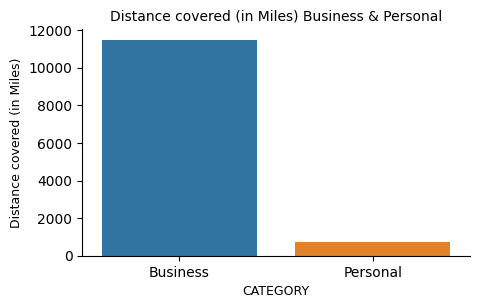

In [17]:
print('Distance Covered in miles in Business and Personal Trip')
print(df.groupby(['CATEGORY*'])['MILES*'].sum())

plt.figure(figsize=(5,3), dpi = 100)
sns.barplot(x= 'CATEGORY*', y = 'MILES*', data = df, estimator=np.sum, ci= None)
sns.despine()
plt.title('Distance covered (in Miles) Business & Personal',fontsize = 10)
plt.xlabel('CATEGORY',fontsize = 9)
plt.ylabel('Distance covered (in Miles)',fontsize = 9)
plt.show()

### 2. Start*

Top 10 Starting Point
Cary              201
Morrisville        85
Whitebridge        68
Islamabad          57
Lahore             36
Durham             36
Raleigh            28
Kar?chi            27
Westpark Place     17
Apex               17
Name: START*, dtype: int64


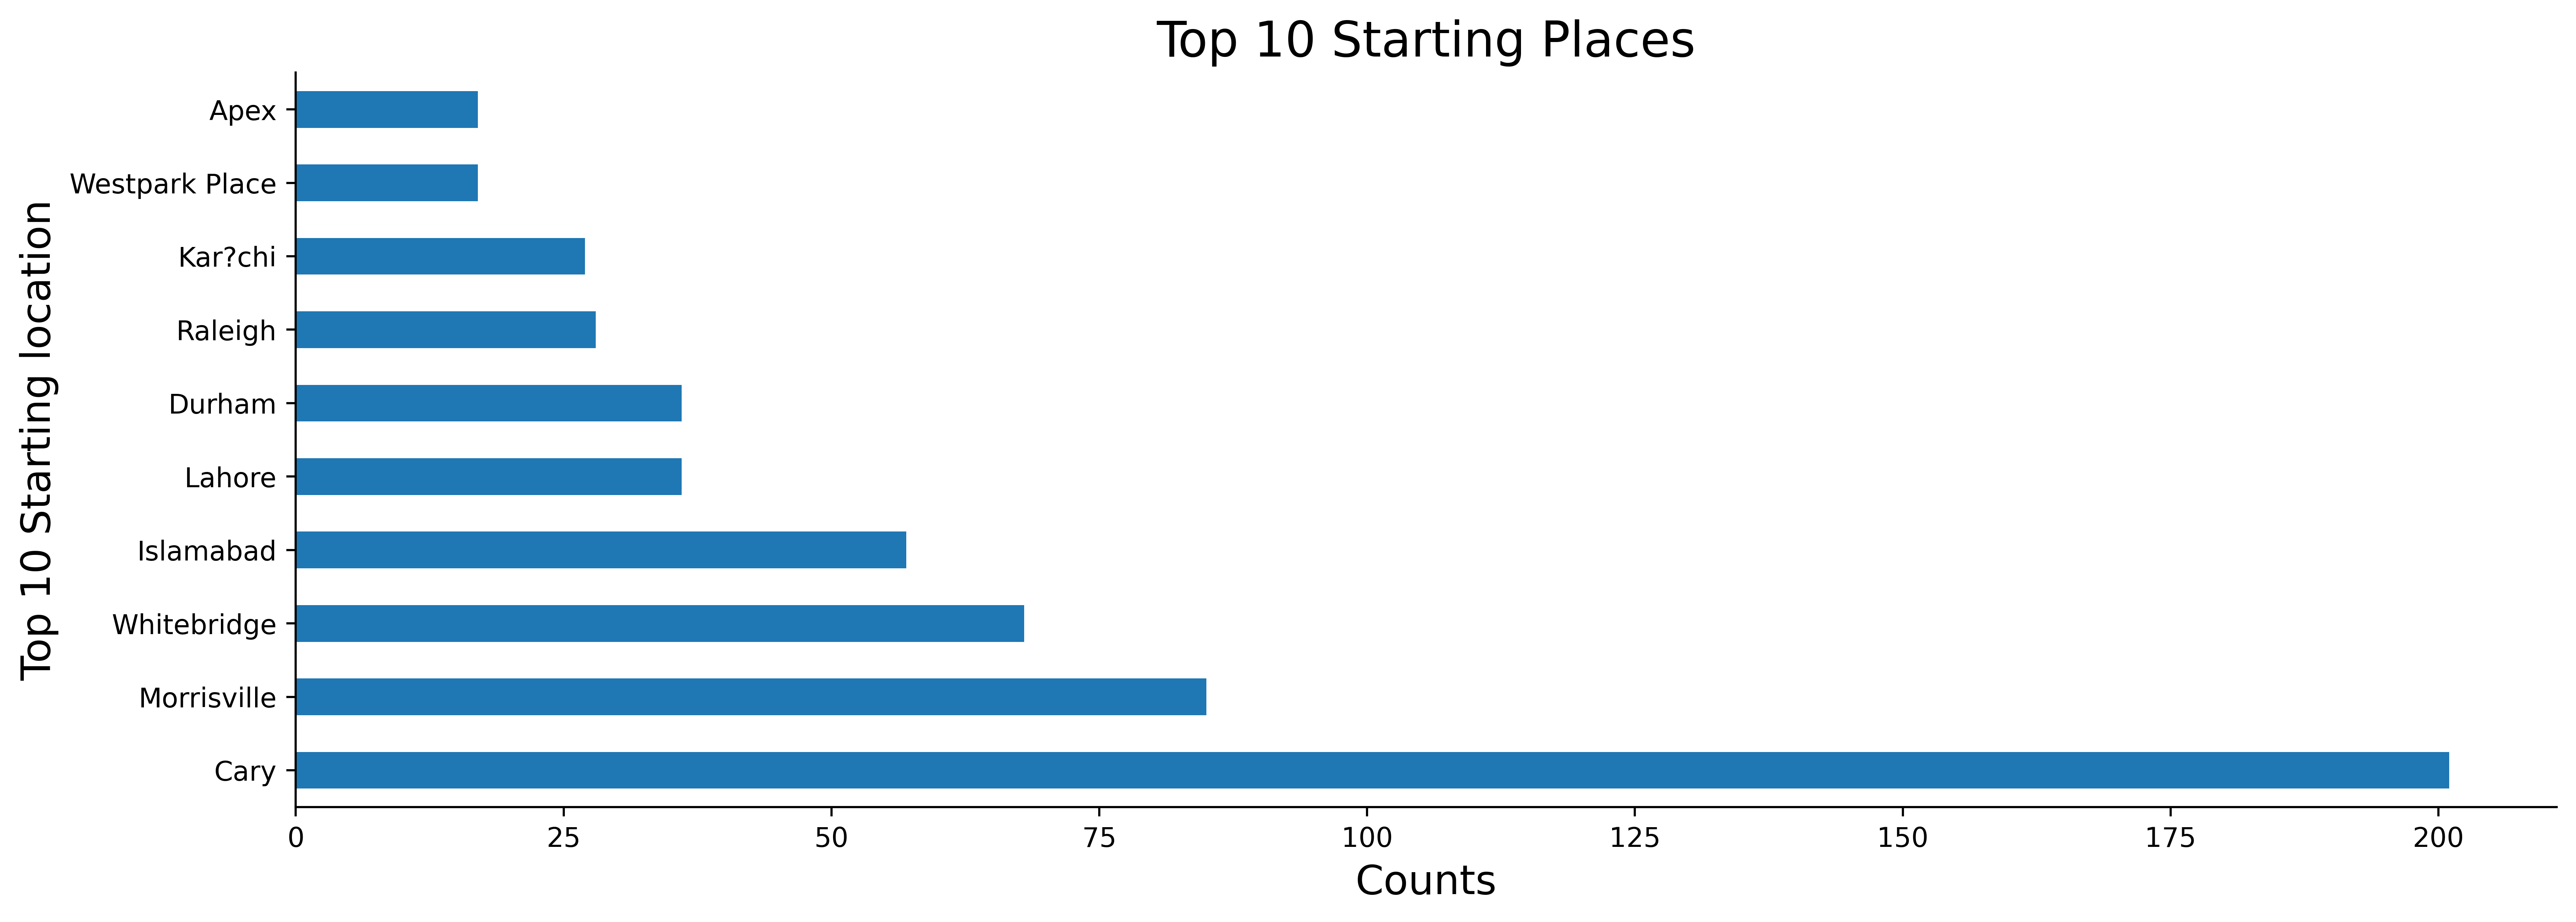

In [18]:
print('Top 10 Starting Point')
print(df[df['START*']!='Unknown Location']['START*'].value_counts()[:10])

plt.figure(figsize=(15,5), dpi = 523)

df[df['START*']!='Unknown Location']['START*'].value_counts(ascending=False)[:10].plot(kind='barh')
#sns.countplot(y= 'START*', data = df, order=df[df['START*']!='Unknown Location']['START*'].value_counts().index[:10])
sns.despine()
plt.title('Top 10 Starting Places',fontsize = 18)
plt.xlabel('Counts',fontsize = 15)
plt.ylabel('Top 10 Starting location',fontsize = 15)
plt.show()

### 3. Stop*

Top 10 Destination
Cary           202
Morrisville     84
Whitebridge     65
Islamabad       58
Durham          36
Lahore          36
Raleigh         29
Kar?chi         26
Apex            17
Berkeley        16
Name: STOP*, dtype: int64


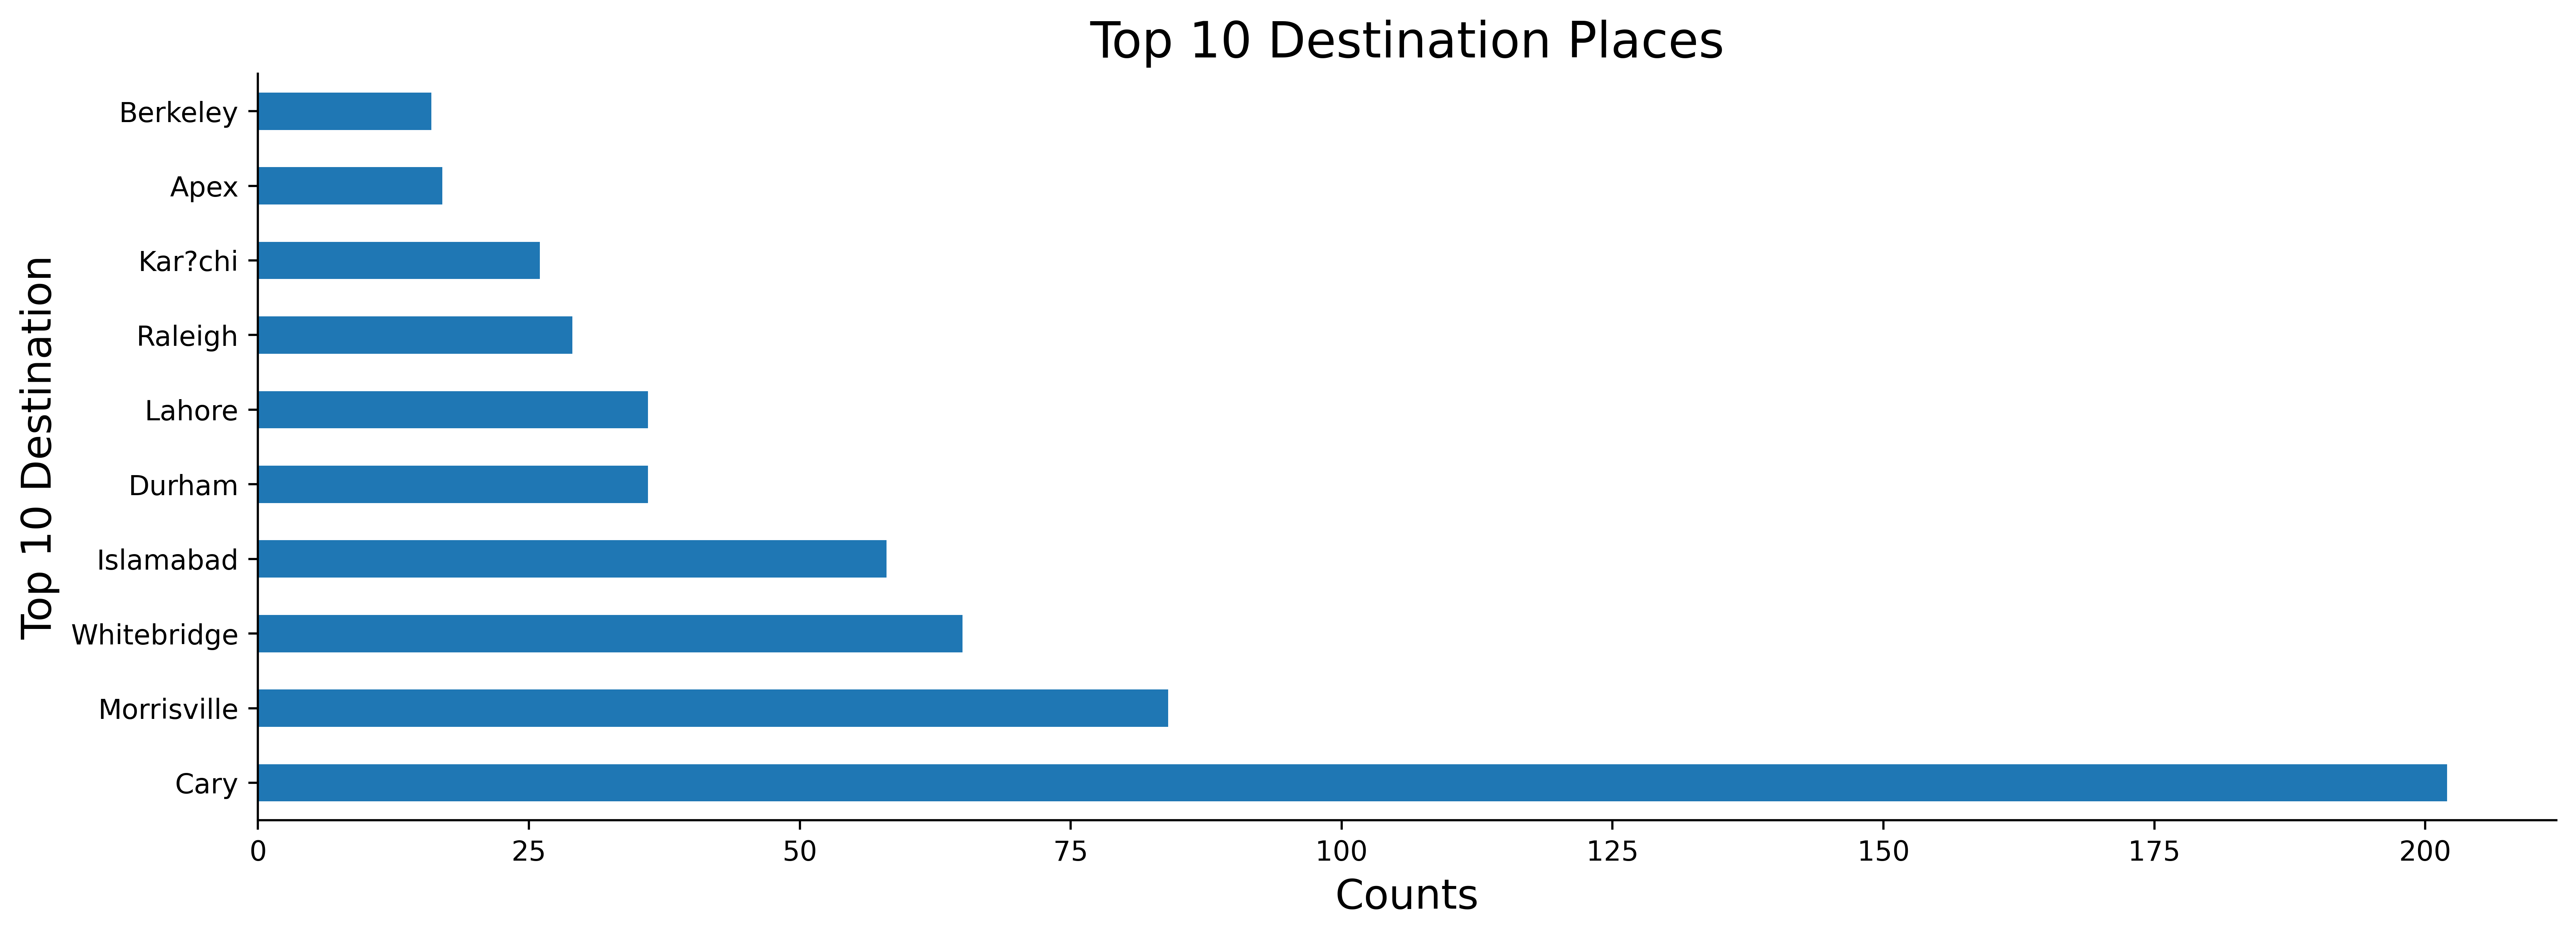

In [19]:
print('Top 10 Destination')
print(df[df['STOP*']!='Unknown Location']['STOP*'].value_counts(ascending=False)[:10])

plt.figure(figsize=(15,5), dpi = 523)

df[df['STOP*']!='Unknown Location']['STOP*'].value_counts(ascending=False)[:10].plot(kind='barh')
#sns.countplot(y= 'STOP*', data = df, order=df['STOP*'].value_counts().index[:10])
sns.despine()
plt.title('Top 10 Destination Places',fontsize = 18)
plt.xlabel('Counts',fontsize = 15)
plt.ylabel('Top 10 Destination',fontsize = 15)
plt.show()

#### Unknown starting location 

In [20]:
df[df['START*']=='Unknown Location']['START*'].value_counts()

Unknown Location    148
Name: START*, dtype: int64

#### Unknown Destinations

In [21]:
df[df['STOP*']=='Unknown Location']['STOP*'].value_counts()

Unknown Location    149
Name: STOP*, dtype: int64

### 4. Miles*

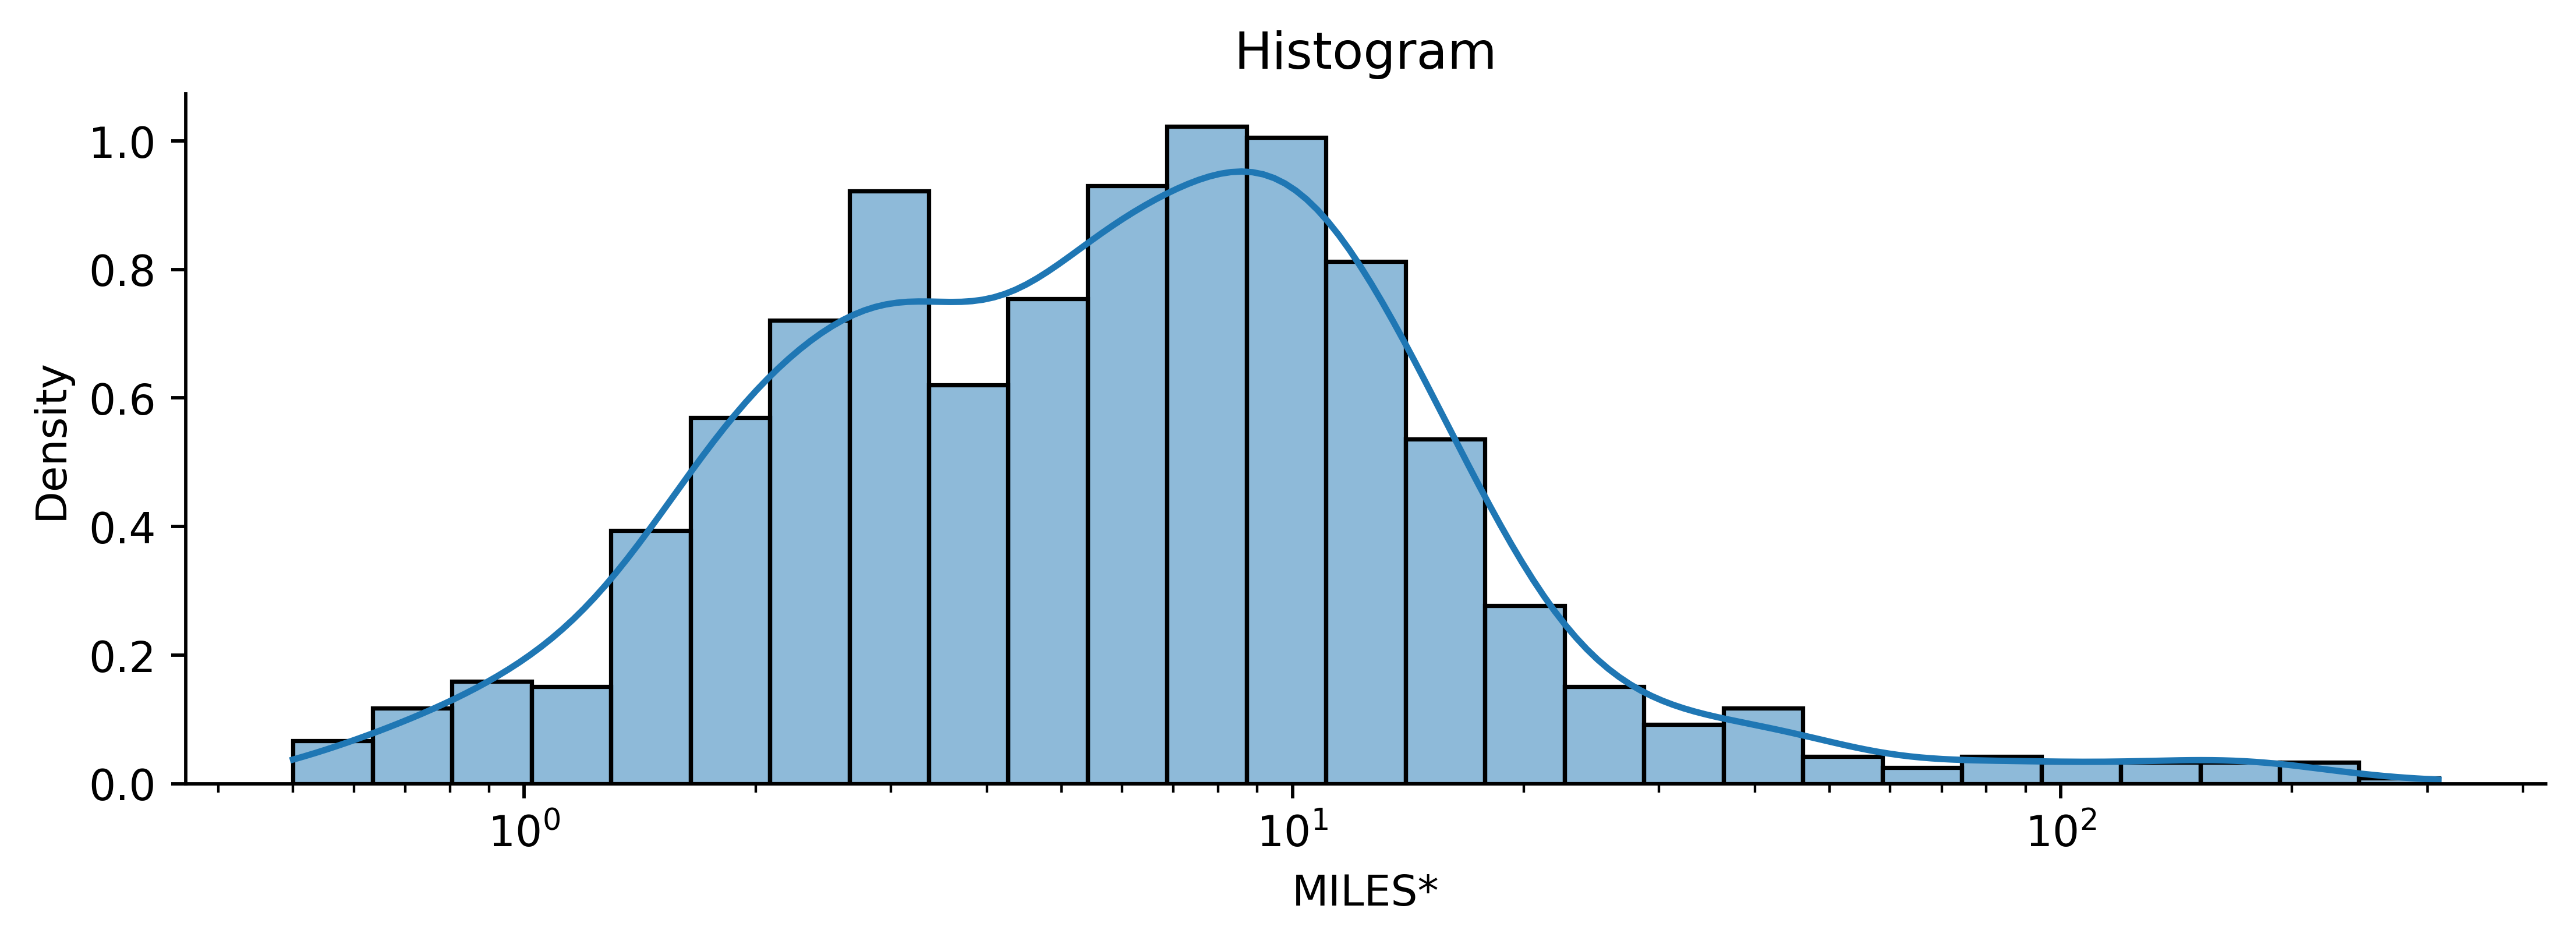

In [22]:
plt.figure(figsize=(10,3), dpi=523)
sns.histplot(df['MILES*'], kde=True, stat='density', log_scale=10)
sns.despine()
plt.title('Histogram')
plt.show()

* **Miles data is Rightly Skewed **

#### Statistic Description of Data

In [23]:
df.describe()

,MILES*
count,1154.000000
mean,10.567418
std,21.588452
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


## Multivariate analysis

#### Farthest Distance Ride

START*            STOP*           
Morrisville       Cary                395.7
Cary              Durham              390.0
                  Morrisville         380.0
Raleigh           Cary                365.7
Cary              Raleigh             336.5
Durham            Cary                324.5
Latta             Jacksonville        310.3
Islamabad         Unknown Location    267.0
Cary              Cary                255.9
Unknown Location  Islamabad           243.8
Name: MILES*, dtype: float64


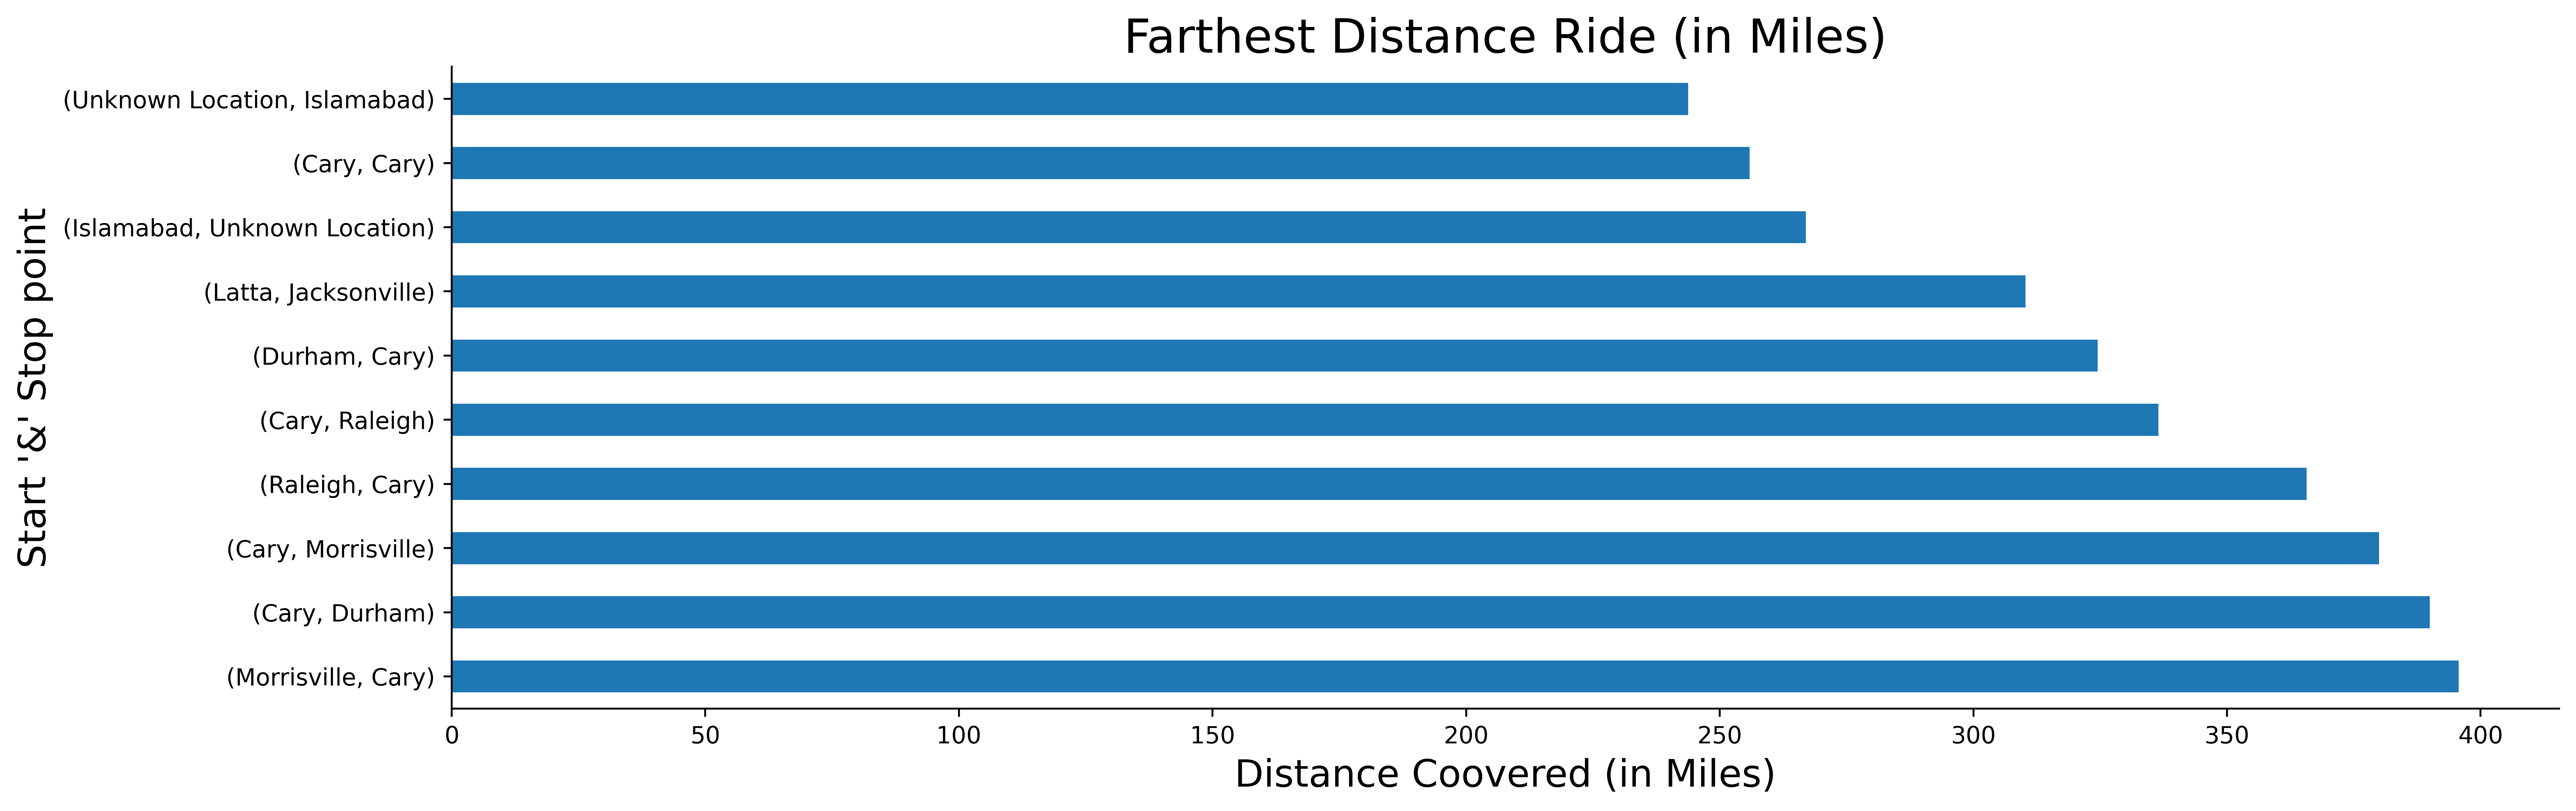

In [24]:
print(df.groupby(['START*','STOP*'])['MILES*'].sum().sort_values(ascending=False)[1:11])

plt.figure(figsize=(16,5), dpi = 523)

df.groupby(['START*','STOP*'])['MILES*'].sum().sort_values(ascending=False)[1:11].plot(kind='barh')
sns.despine()
plt.title('Farthest Distance Ride (in Miles)',fontsize = 20)
plt.xlabel('Distance Coovered (in Miles)',fontsize = 16)
plt.ylabel("Start '&' Stop point",fontsize = 16)
plt.show()

* **Cary-Morrisville & Cary-Durham and vice versa are the farthest distance ride.**

### Round Trip

In [25]:
def is_roundtrip(df):
    if df['START*'] == df['STOP*']:
        return 'YES'
    else:
        return 'NO'

NO     866
YES    288
Name: ROUND_TRIP*, dtype: int64


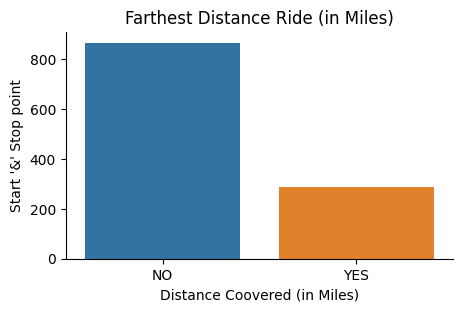

In [26]:
df['ROUND_TRIP*'] = df.apply(is_roundtrip, axis=1)
print(df['ROUND_TRIP*'].value_counts())

plt.figure(figsize=(5,3), dpi = 100)

sns.countplot(x='ROUND_TRIP*',data=df, order=df['ROUND_TRIP*'].value_counts().index)
sns.despine()
plt.title('Farthest Distance Ride (in Miles)')
plt.xlabel('Distance Coovered (in Miles)')
plt.ylabel("Start '&' Stop point")
plt.show()

###  Ride Duration

In [27]:
df['Ride_duration'] = df['END_DATE*']-df['START_DATE*']

# using datetime.Timedelta  => https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html
df.loc[:, 'Ride_duration'] = df['Ride_duration'].apply(lambda x: pd.Timedelta.to_pytimedelta(x).days/(24*60) 
                                                       + pd.Timedelta.to_pytimedelta(x).seconds/60)
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,ROUND_TRIP*,Ride_duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,YES,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,YES,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,YES,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,YES,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,NO,67.0


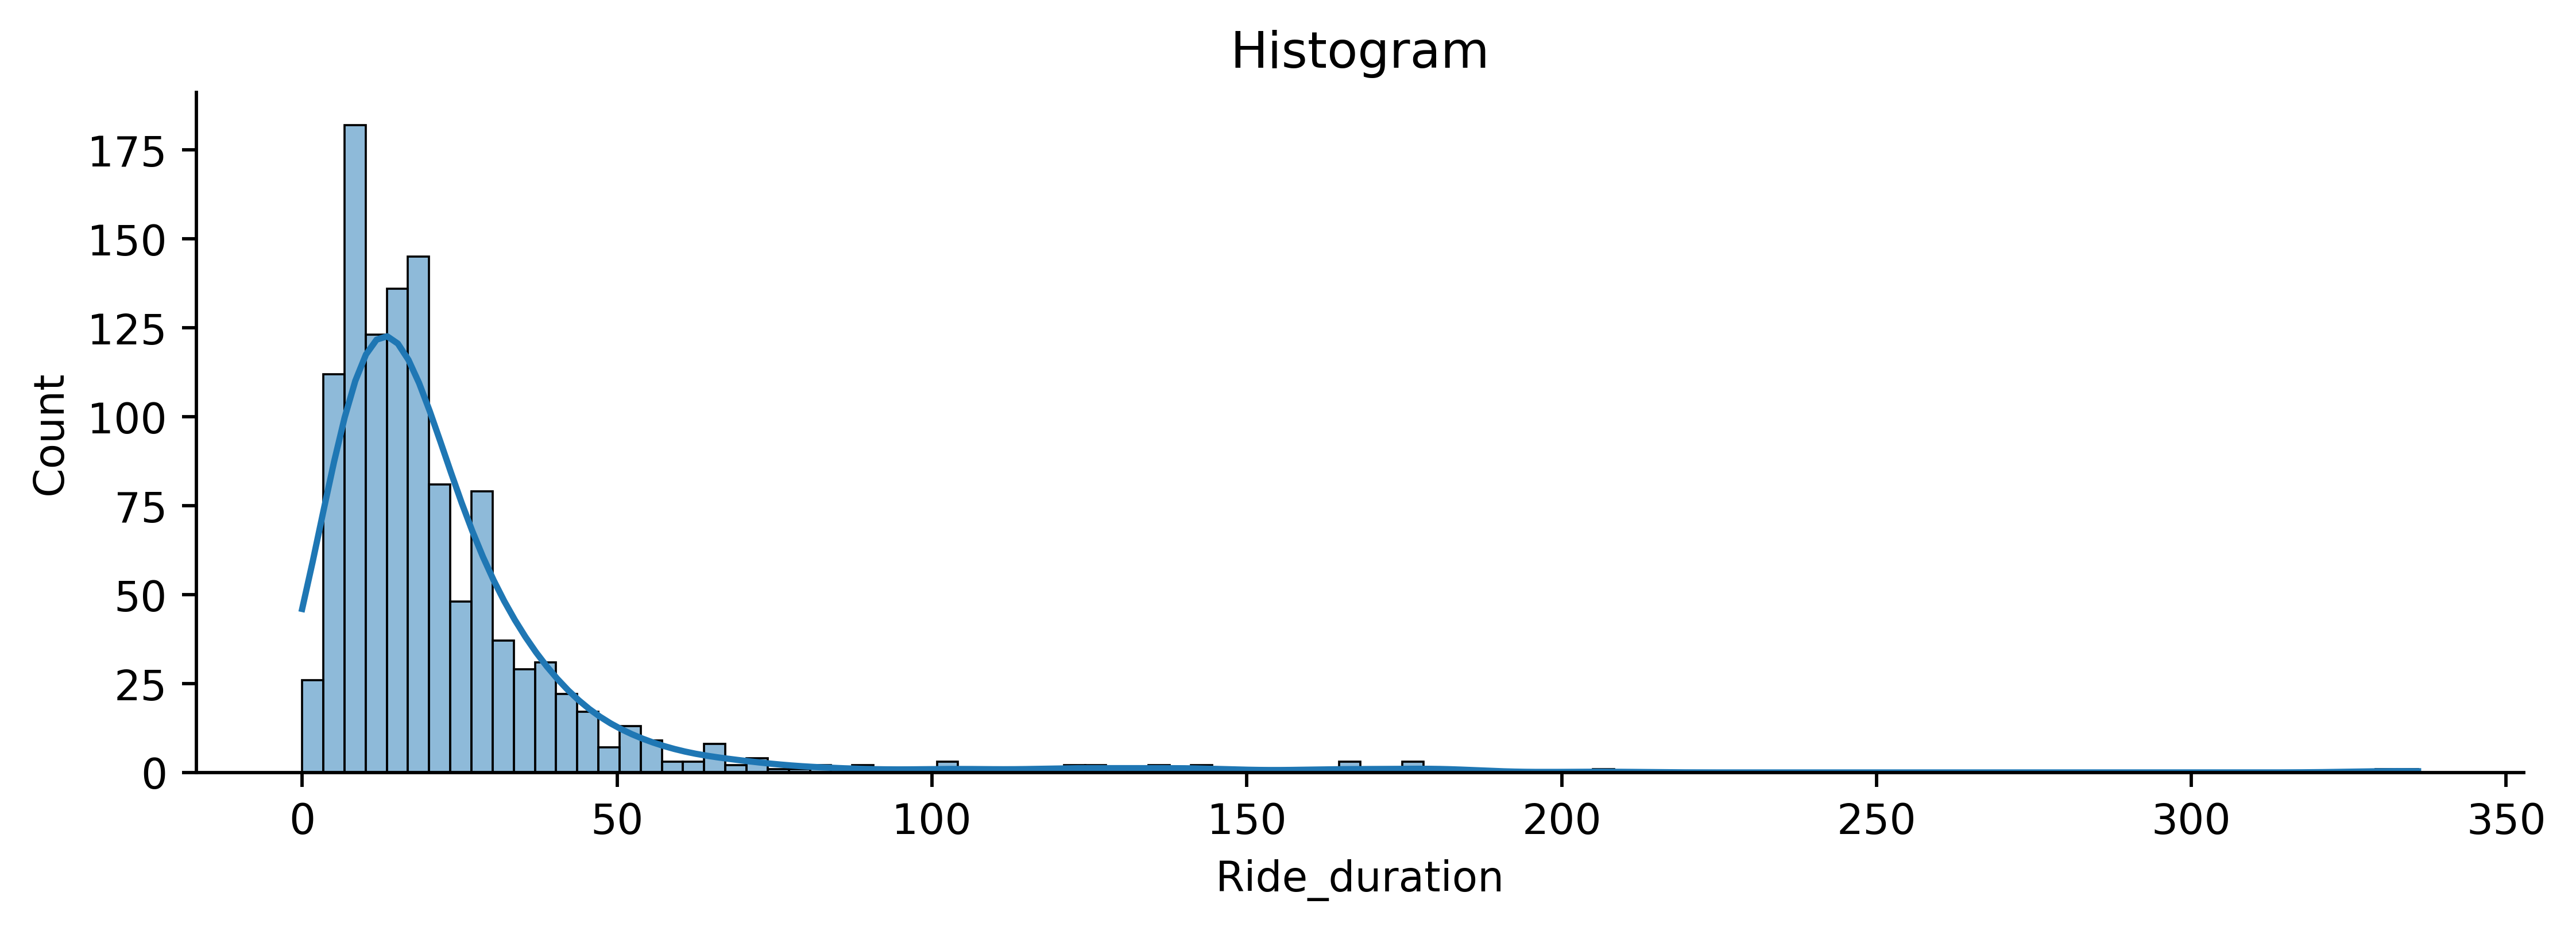

In [28]:
plt.figure(figsize=(10,3), dpi=523)
sns.histplot(df['Ride_duration'], kde=True)
sns.despine()
plt.title('Histogram')
plt.show()

* **Ride Duration is rightly skewed**

### Capture Hour, Day, Month and Year of Ride in a separate column

In [29]:
df['Year'] = pd.to_datetime(df['START_DATE*']).dt.year
df['Month'] = pd.to_datetime(df['START_DATE*']).dt.month
df['Dt_month'] = pd.to_datetime(df['START_DATE*']).dt.day
df['Hour'] = pd.to_datetime(df['START_DATE*']).dt.hour

df.head(2)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,ROUND_TRIP*,Ride_duration,Year,Month,Dt_month,Hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,YES,6.0,2016,1,1,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,YES,12.0,2016,1,2,1


#### Add Day name & Month name instead of Day and Month

In [30]:
# Adding day_number of week
df['day_of_week'] = pd.to_datetime(df['START_DATE*']).dt.dayofweek
# Days
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
# Replace day_number with Day Name
df['day_of_week'] = df['day_of_week'].apply(lambda x: days[x])

# Adding Month name
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,ROUND_TRIP*,Ride_duration,Year,Month,Dt_month,Hour,day_of_week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,YES,6.0,2016,Jan,1,21,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,YES,12.0,2016,Jan,2,1,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,YES,13.0,2016,Jan,2,20,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,YES,14.0,2016,Jan,5,17,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,NO,67.0,2016,Jan,6,14,Wed


### Total Month wise Rides count

Total Month wise Rides count
Jan     61
Feb    115
Mar    113
Apr     54
May     49
Jun    107
Jul    112
Aug    133
Sep     36
Oct    106
Nov    122
Dec    146
Name: Month, dtype: int64


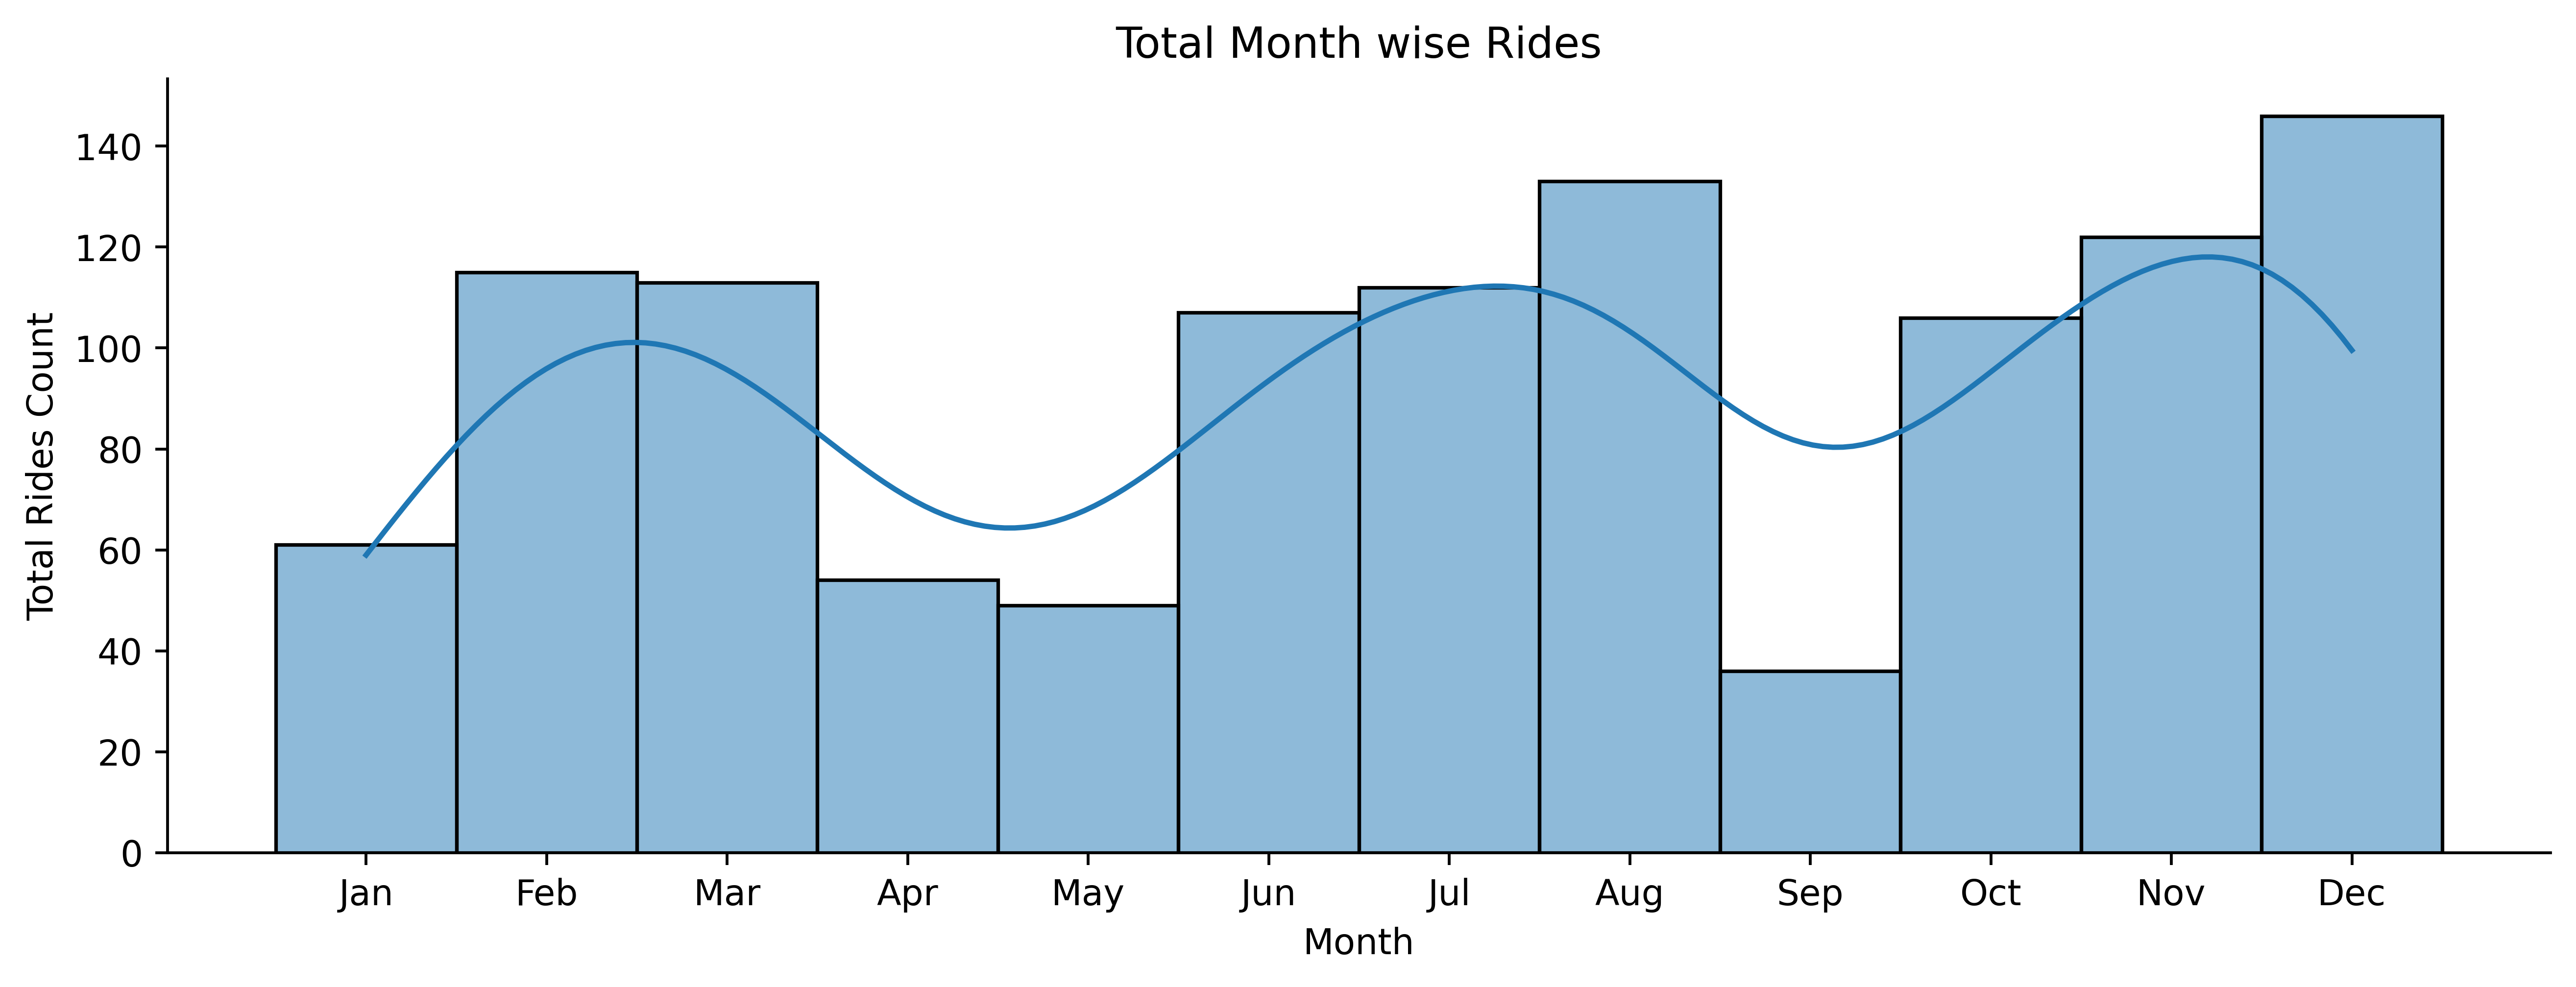

In [31]:
print('Total Month wise Rides count')
print(df['Month'].value_counts(sort=False))

plt.figure(figsize=(12,4), dpi=523)
sns.histplot(df['Month'], kde=True)
sns.despine()
plt.title('Total Month wise Rides')
plt.ylabel('Total Rides Count')
plt.show()

* Rides count is periodic according to Month wise 
* **Most number of rides were in month of December**<br>
* Top 5 months having most trips were:    ```December, August, November, February & March ```

In [32]:
days.values()

dict_values(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])

#### Total Day wise Rides in Personal and Business Trip

CATEGORY*  day_of_week
Business   Fri            192
           Mon            165
           Sat            132
           Sun            142
           Thur           147
           Tue            161
           Wed            138
Personal   Fri             14
           Mon              9
           Sat             18
           Sun              6
           Thur             7
           Tue             14
           Wed              9
Name: day_of_week, dtype: int64


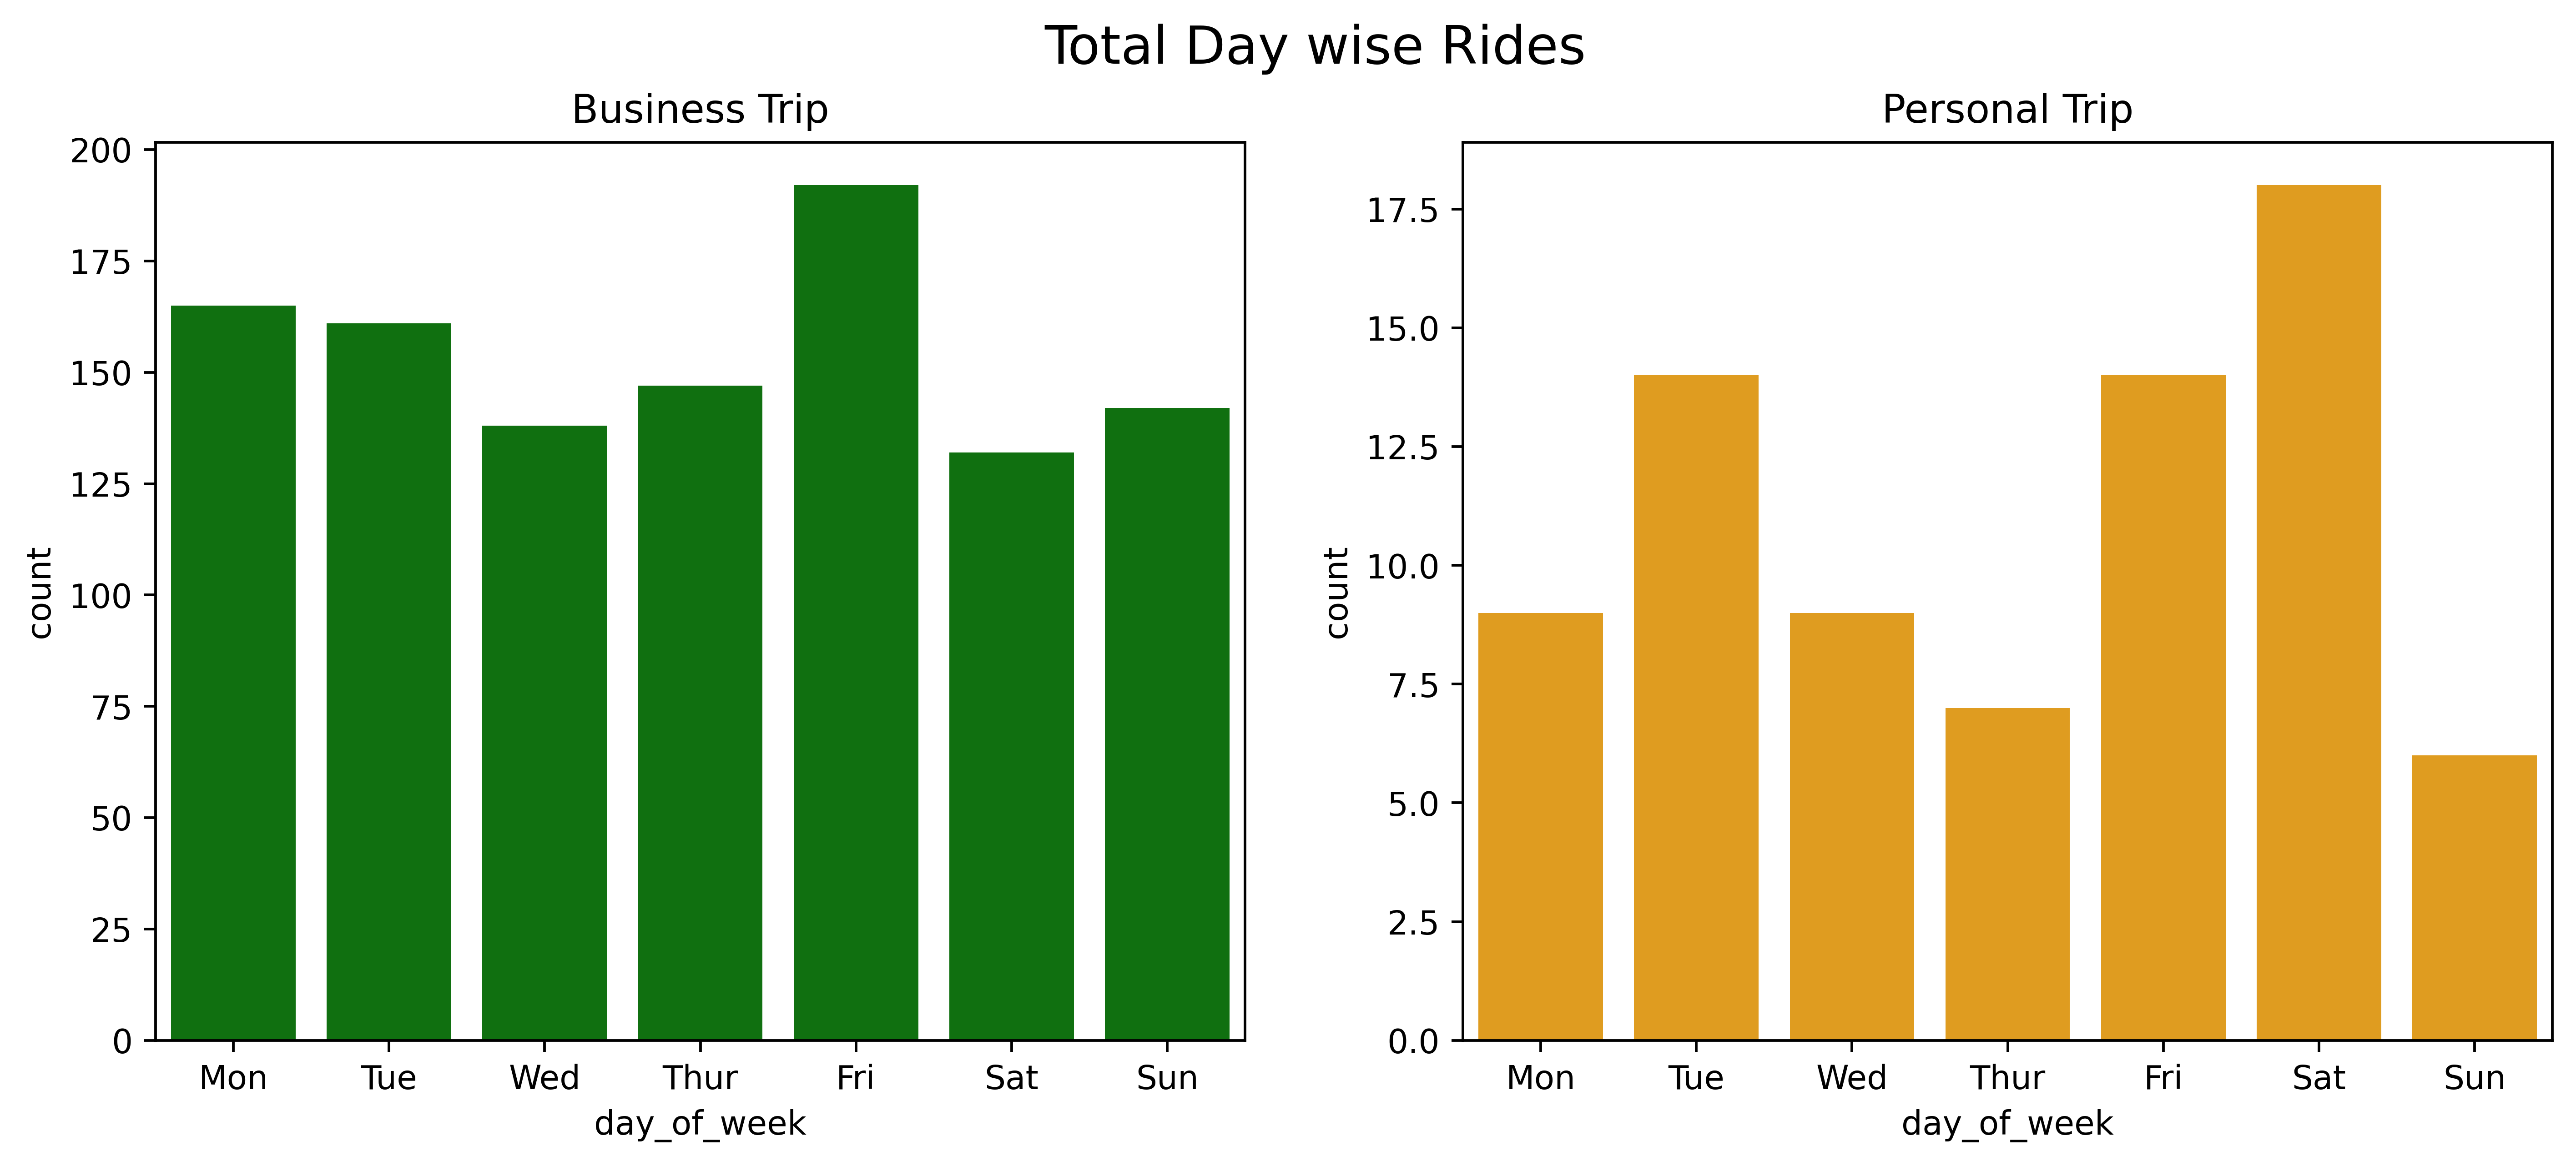

In [33]:
print(df.groupby(['CATEGORY*','day_of_week'])['day_of_week'].count())

plt.figure(figsize=(13,5), dpi=523)
plt.subplot(1, 2, 1)
sns.countplot(x='day_of_week', data=df[df['CATEGORY*']=='Business'], order=days.values(), color='green')
plt.title('Business Trip')
plt.subplot(1, 2, 2)
sns.countplot(x='day_of_week', data=df[df['CATEGORY*']=='Personal'], order=days.values(), color='orange')
plt.title('Personal Trip')

plt.suptitle('Total Day wise Rides', fontsize=16)
plt.show()

**```Business``` Trip are more comare to ```Personal trip```**
##### Business
* Highest Business trip is on ```Friday```.
* Lowest Business trip is on ```Saturday```.

##### Personal
* Highest Personal trip is on ```Saturday```.
* Lowest Personal trip is on ```Sunday```.

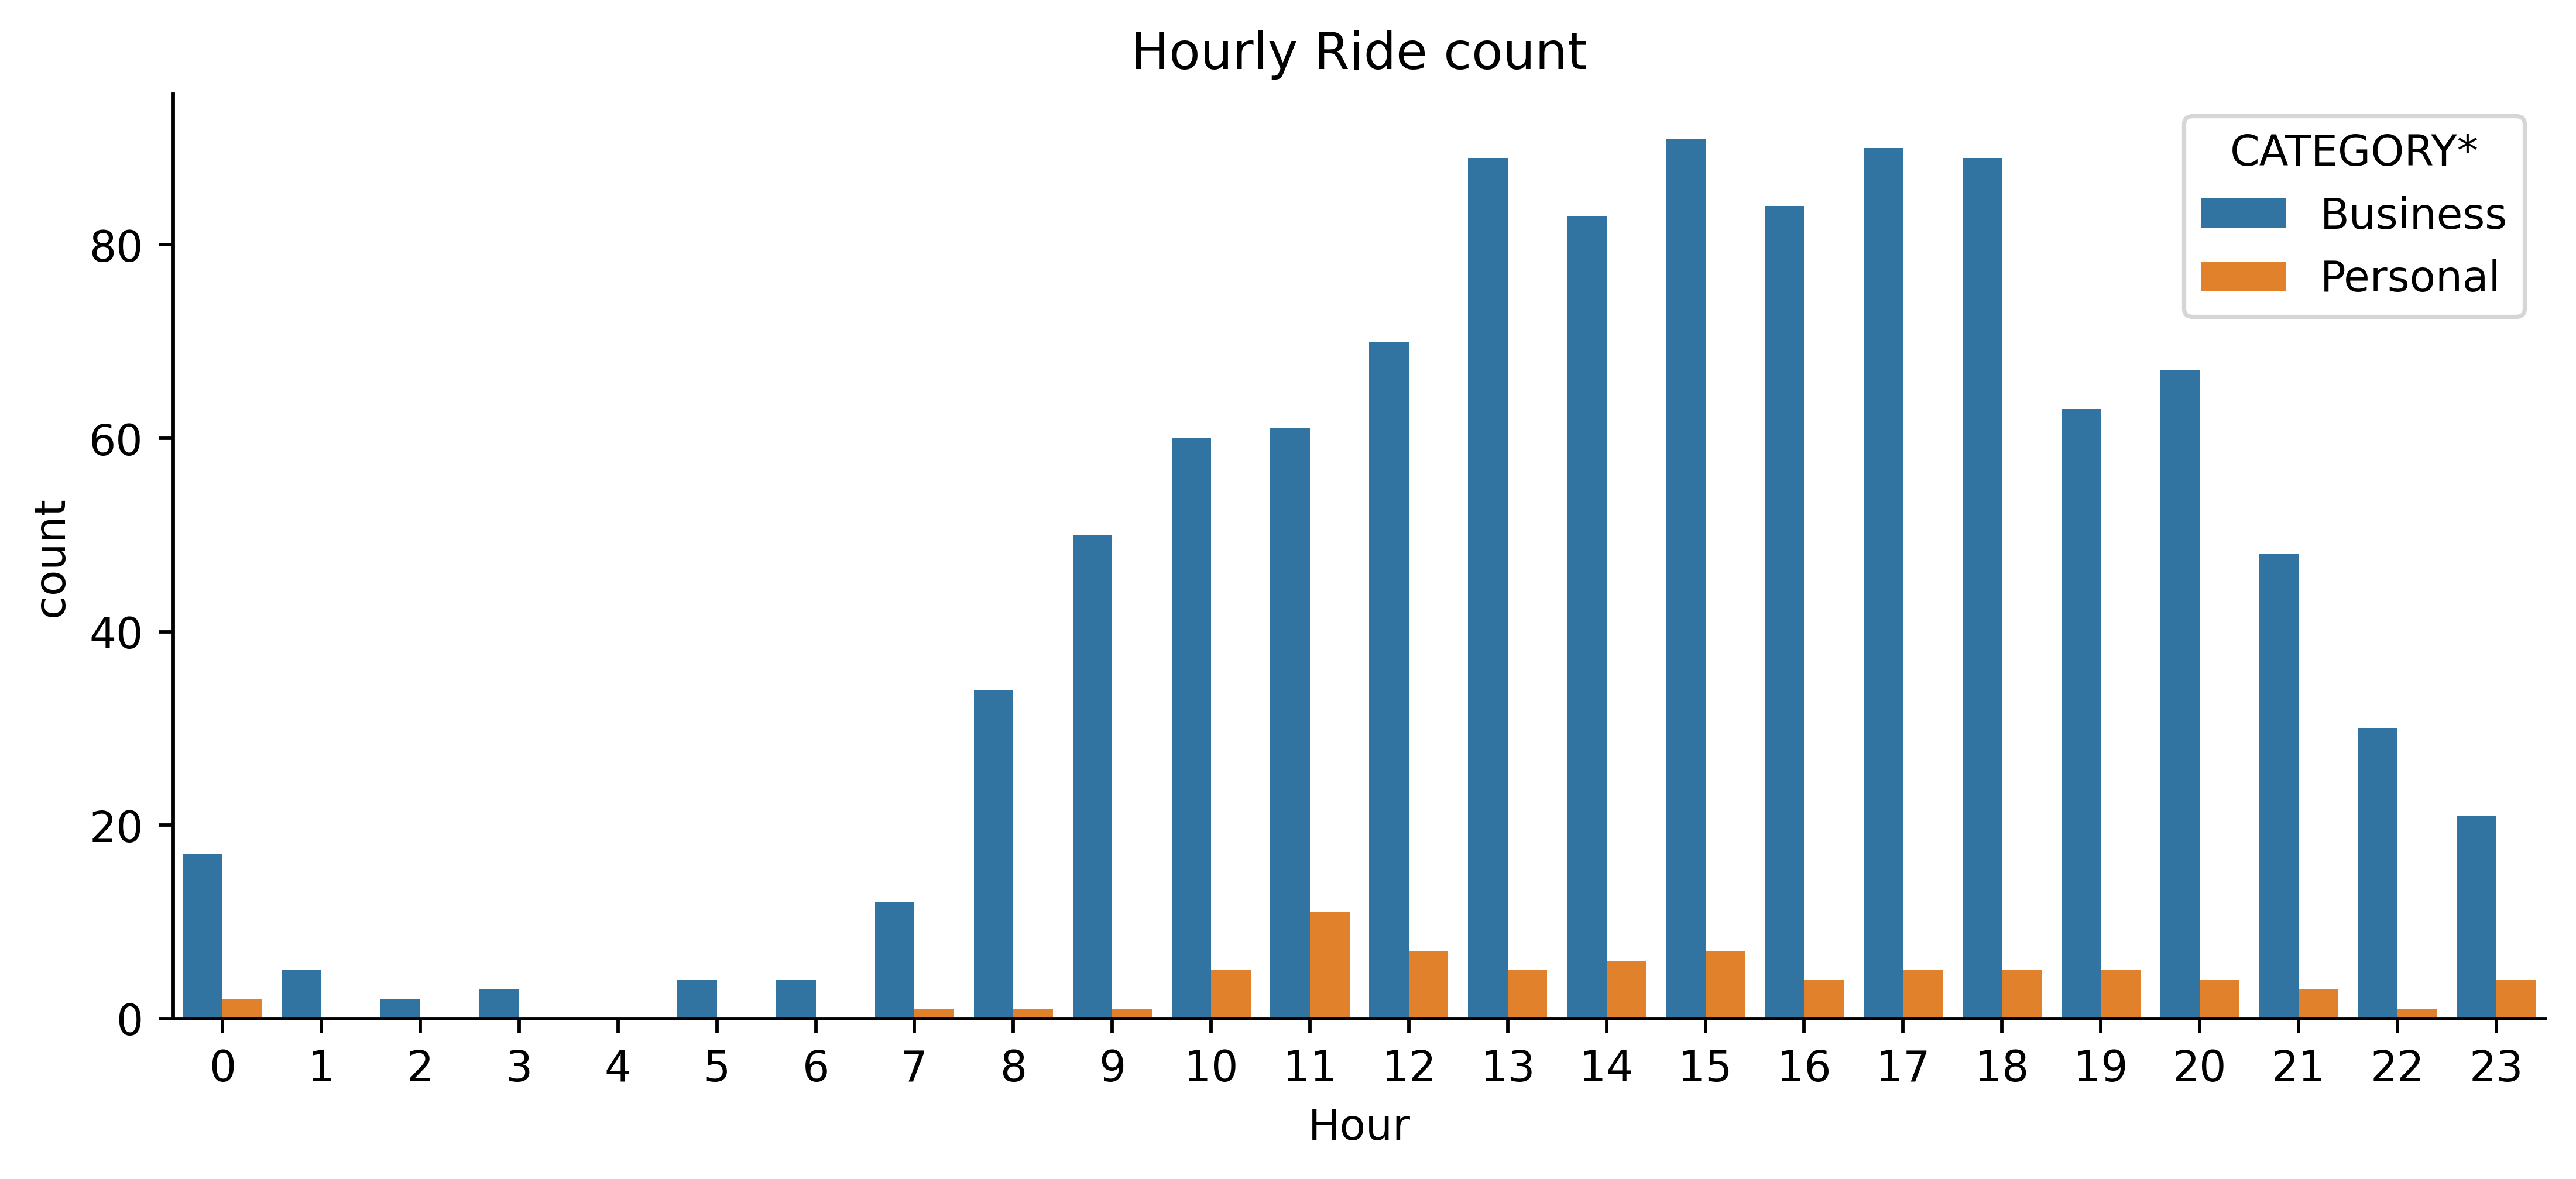

In [34]:
plt.figure(figsize=(10,4), dpi=523)

sns.countplot(x='Hour',data=df,order=range(0,24), hue='CATEGORY*')
sns.despine()
plt.title('Hourly Ride count')
plt.show()

* **Maximim number of trips were on Evening & at noon.**

### Average distance covered

#### Total Average Distance covered accoding to Month in Business and Personal Trip

Month  CATEGORY*
Jan    Business      8.408197
Feb    Business      8.571875
       Personal      4.489474
Mar    Business     17.728235
       Personal      6.678571
Apr    Business     21.601961
       Personal      3.766667
May    Business      7.424490
Jun    Business      7.805660
       Personal      5.500000
Jul    Business      9.255814
       Personal     16.484615
Aug    Business     10.041353
Sep    Business     16.716667
Oct    Business     17.075472
Nov    Business      6.695902
Dec    Business      6.721233
Name: MILES*, dtype: float64


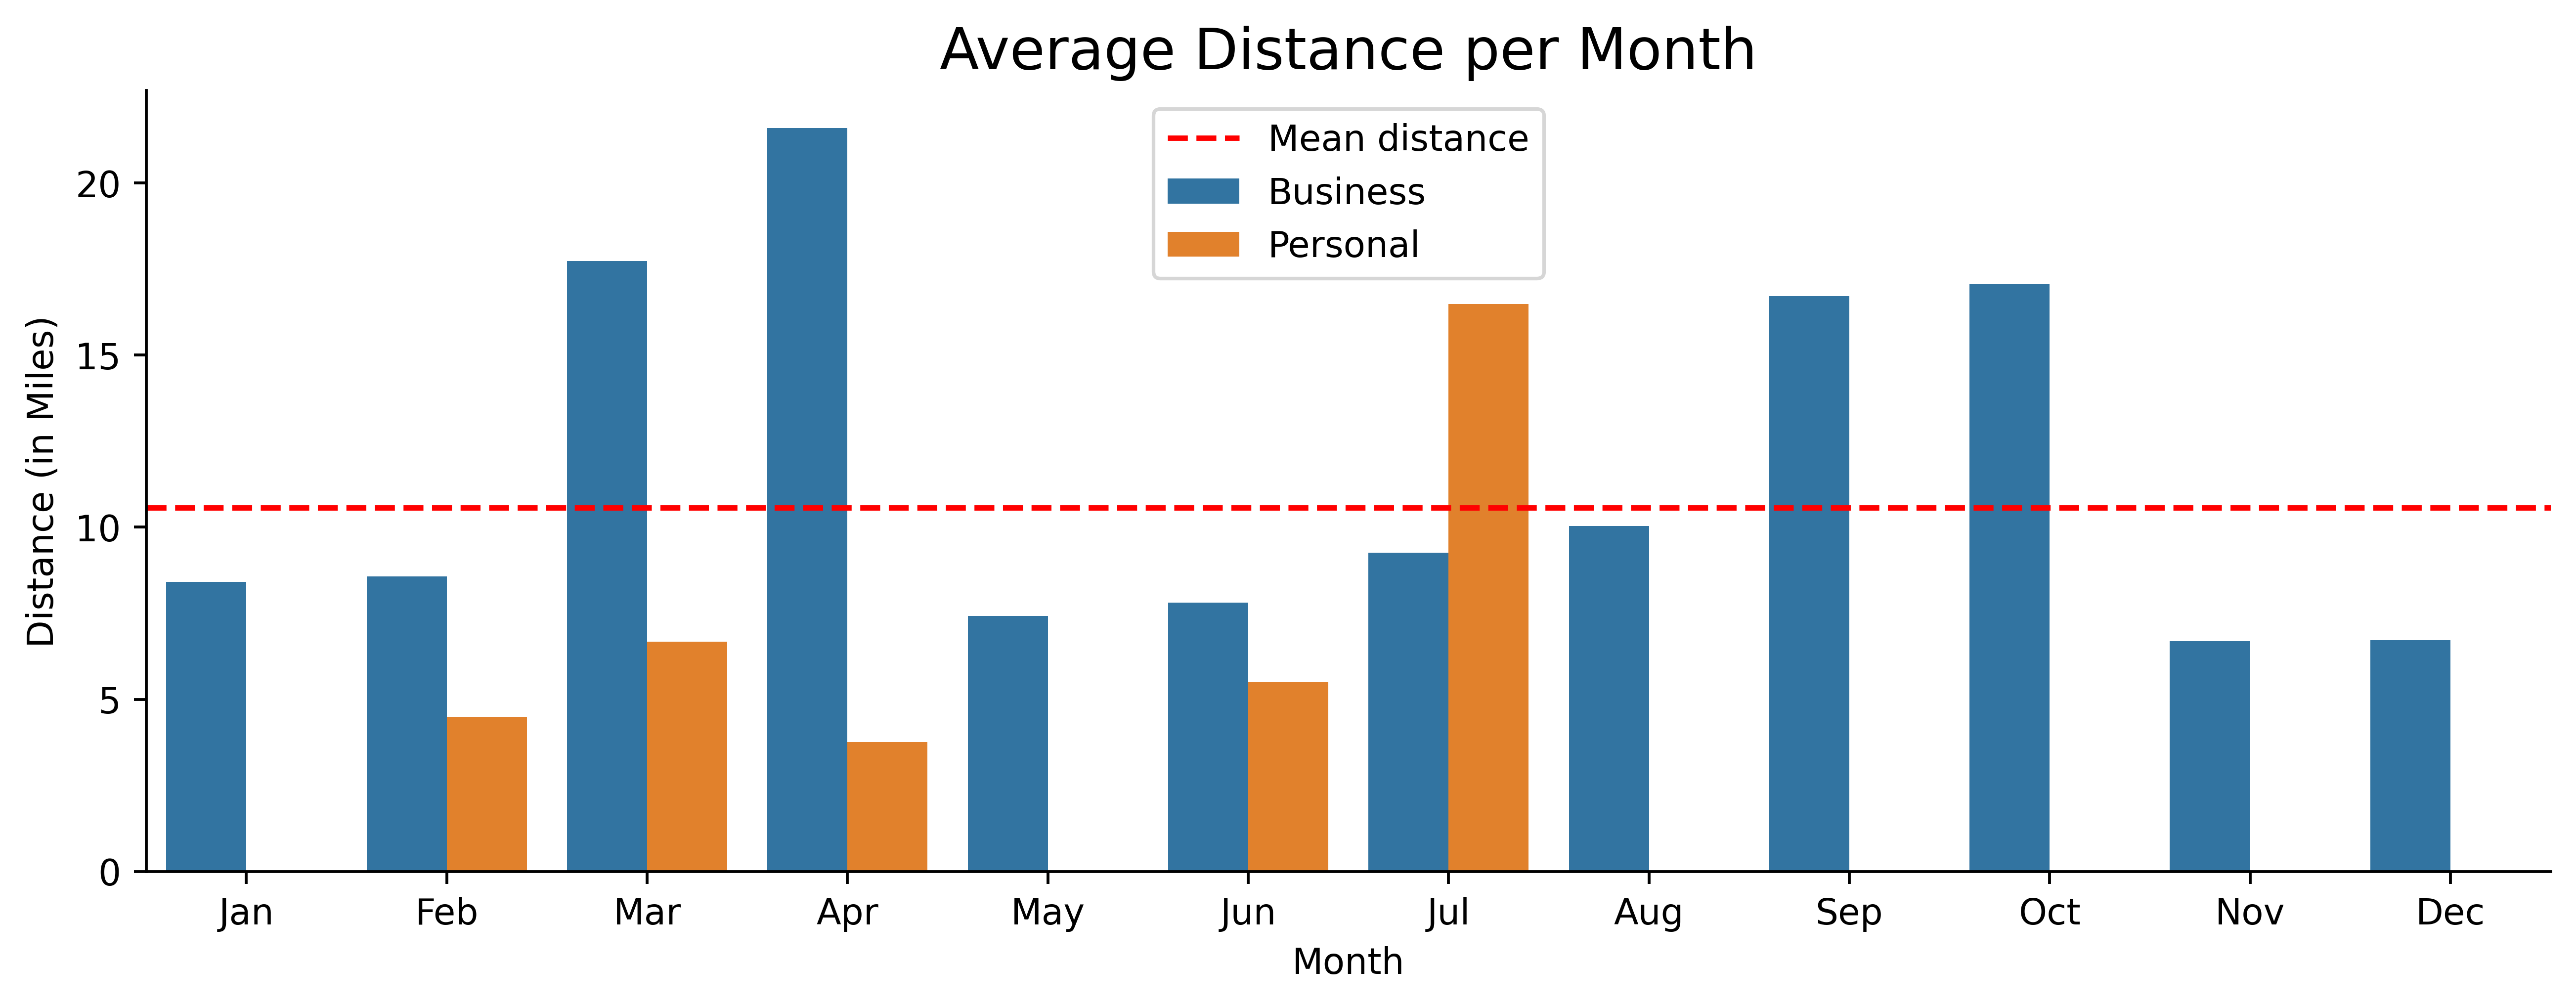

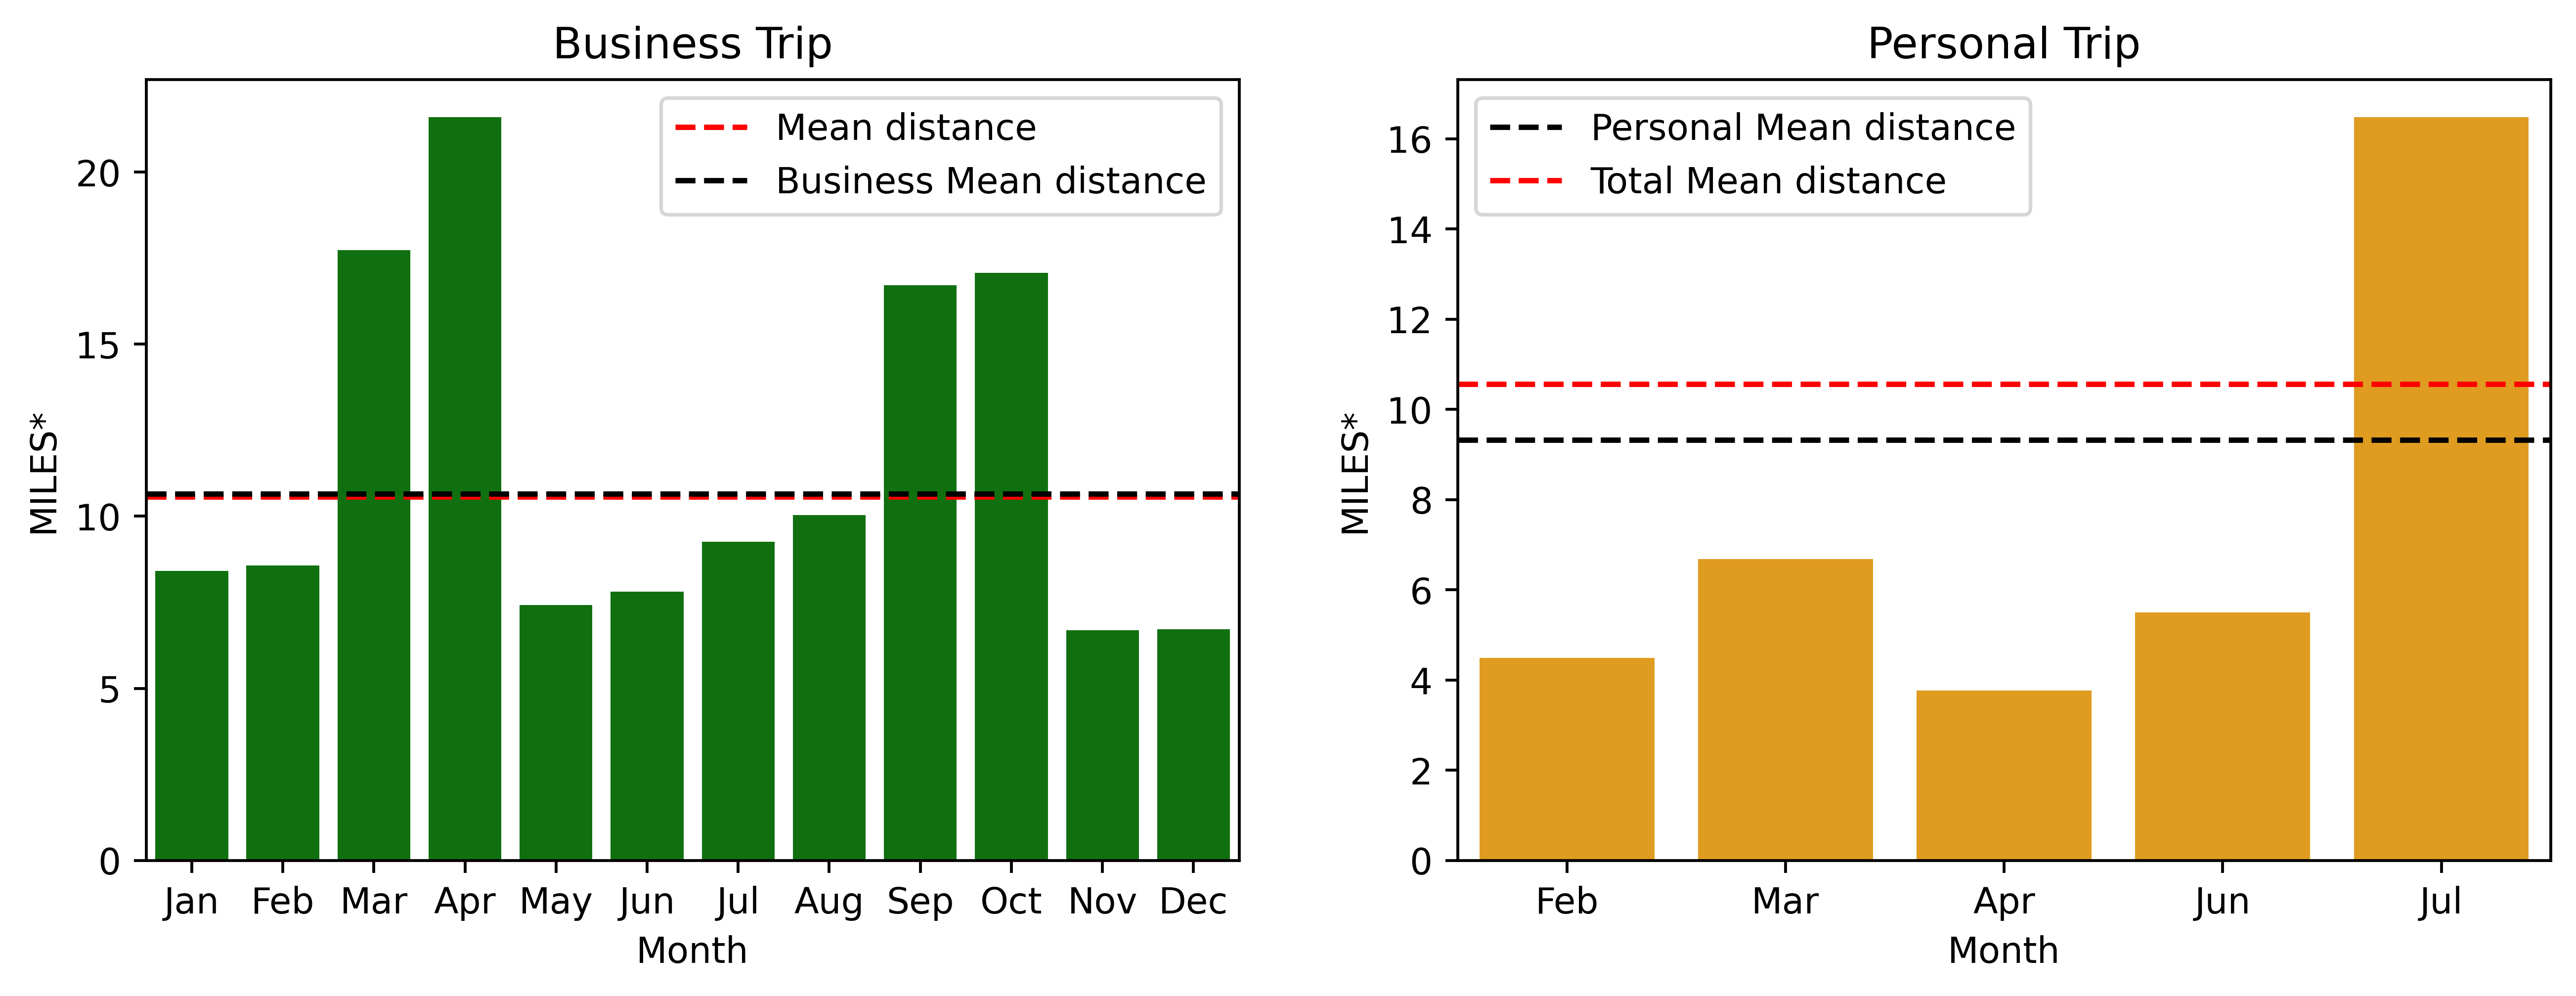

In [35]:
print(df.groupby(['Month','CATEGORY*'],sort= False)['MILES*'].mean())

plt.figure(figsize=(12,4), dpi=523)
sns.barplot(x='Month',y = 'MILES*',data=df, estimator=np.mean, hue='CATEGORY*', ci=None)
plt.axhline(df['MILES*'].mean(), linestyle='--', color='red', label='Mean distance')
plt.legend()
sns.despine()
plt.title('Average Distance per Month', fontsize = 16)
plt.ylabel('Distance (in Miles)')
plt.show()

# Separate Graph for Business and Personal trip
plt.figure(figsize=(12,4), dpi=523)
plt.subplot(1, 2, 1)
sns.barplot(x='Month',y = 'MILES*',data=df[df['CATEGORY*']=='Business'], estimator=np.mean, color='green', ci=None)
plt.axhline(df['MILES*'].mean(), linestyle='--', color='red', label='Mean distance')
plt.axhline(df[df['CATEGORY*']=='Business']['MILES*'].mean(), linestyle='--', color='black', 
            label='Business Mean distance')
plt.legend()
plt.title('Business Trip')

plt.subplot(1, 2, 2)
sns.barplot(x='Month',y = 'MILES*',data=df[df['CATEGORY*']=='Personal'], estimator=np.mean, color='orange', ci=None)
plt.title('Personal Trip')
plt.axhline(df[df['CATEGORY*']=='Personal']['MILES*'].mean(), linestyle='--', color='black', 
            label='Personal Mean distance')
plt.axhline(df['MILES*'].mean(), linestyle='--', color='red', label='Total Mean distance')
plt.legend()

plt.show()

* **User's Longest mean ride was on ```April``` & shortest was on ```November``` for ```Business``` Trip**
* In ```Personal``` Trip, Longest mean ride was on ```July``` month.
* **Uber Ride was used at ```Feb, Mar,Jul,Jun & Apr``` for ```personal trips```.**
* In ```January, May, August, September, October, Novemberm December``` No personal ride
* **Highest distance covered by Uber in ```October``` month (all of them were ```Business``` trips)**
* Only ```March, April, July, September & October``` month rides are above the ```Mean Distance ride of total```.
* Only ```July``` month rides are above the ```Mean Distance ride of total``` in ``Personal`` rides.

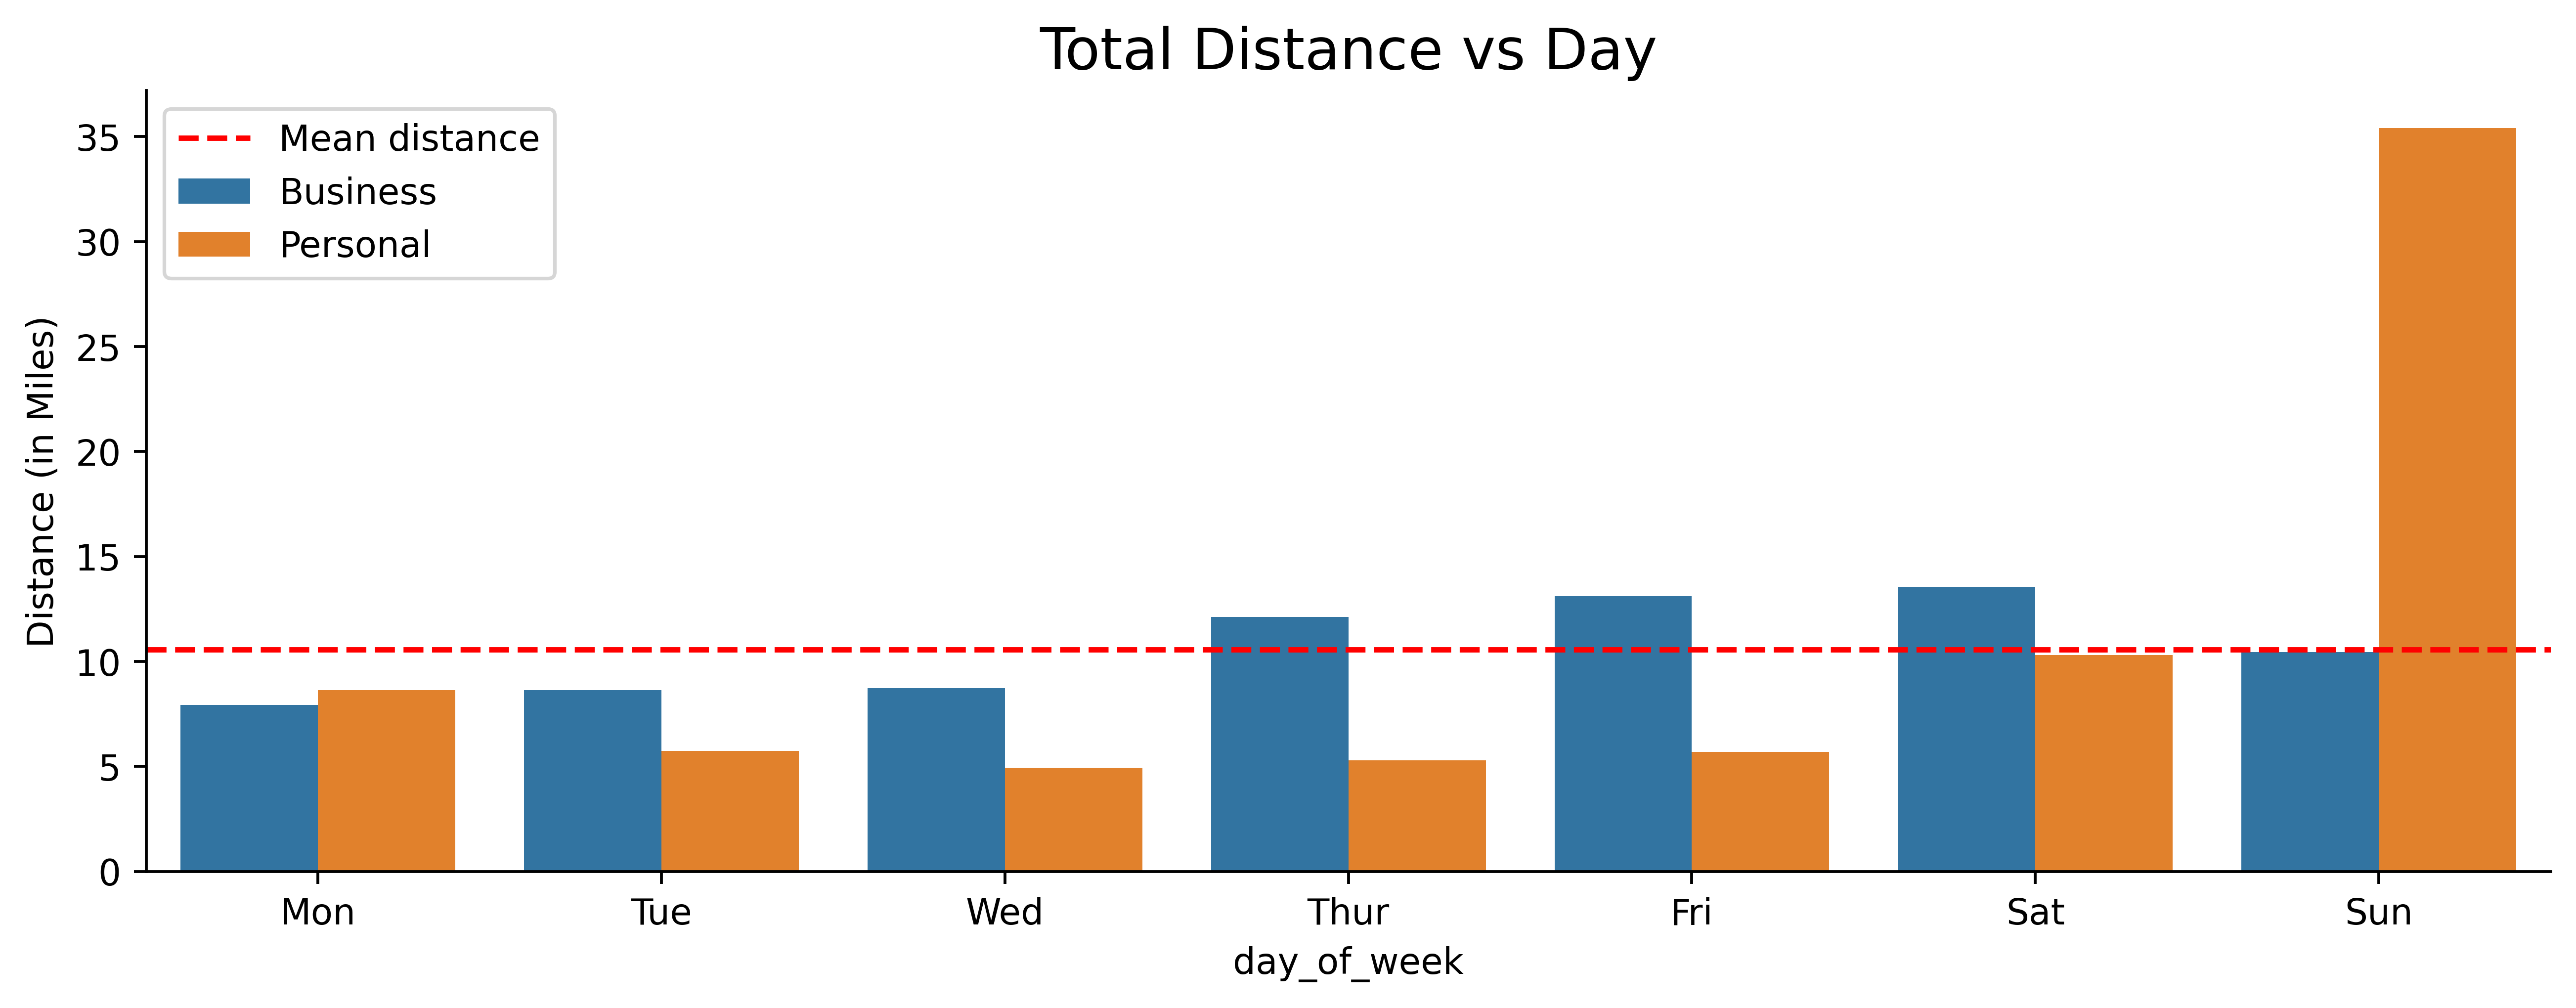

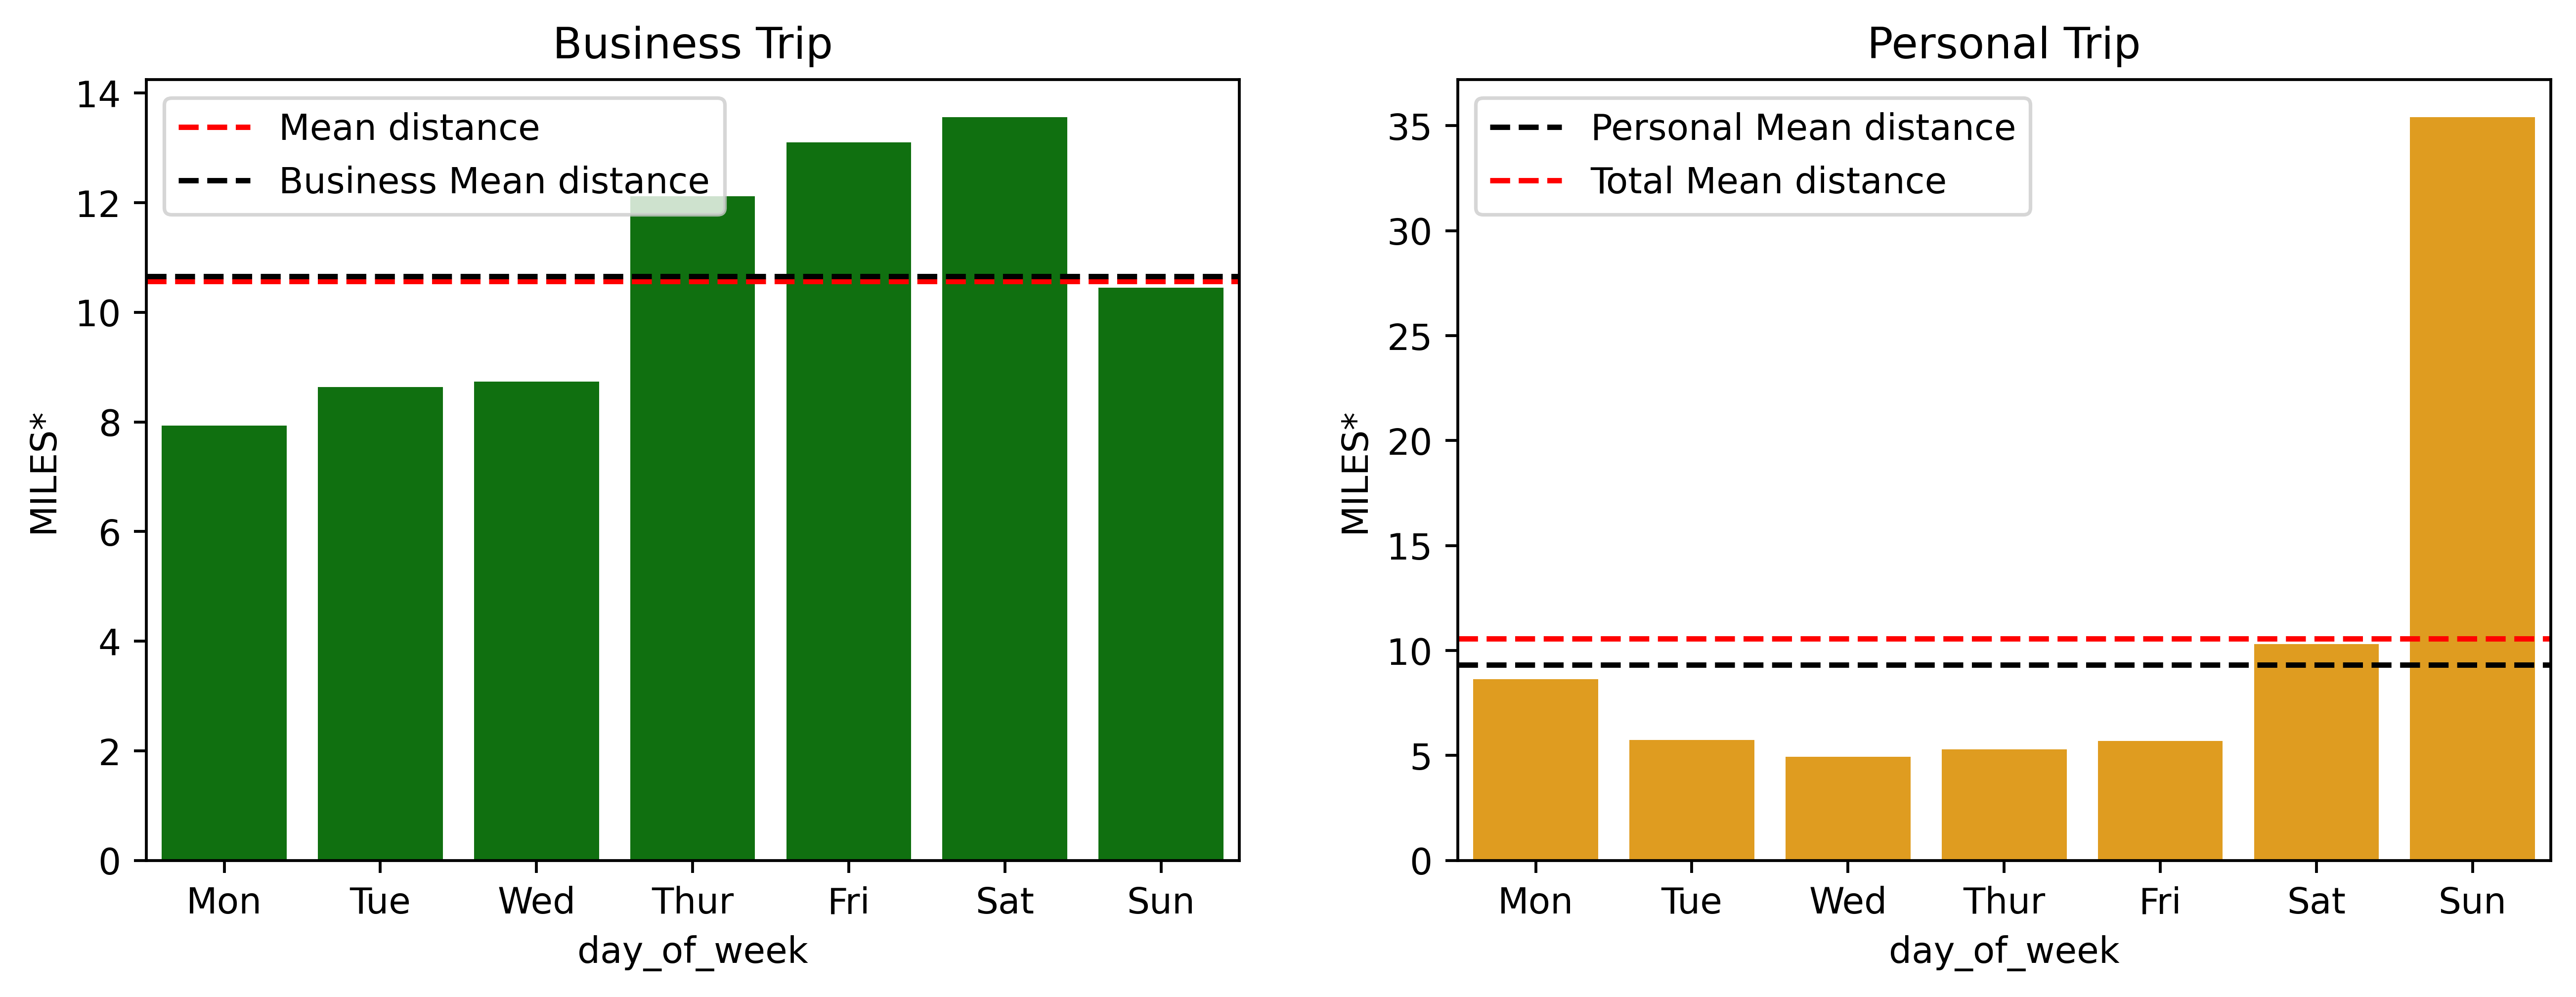

In [36]:
#print(df.groupby(['CATEGORY*','day_of_week'])['MILES*'].count())

plt.figure(figsize=(12,4), dpi=523)

sns.barplot(x='day_of_week',y = 'MILES*',data=df, estimator=np.mean, order=days.values(), hue='CATEGORY*', ci=None)
plt.axhline(df['MILES*'].mean(), linestyle='--', color='red', label='Mean distance')
plt.legend()
sns.despine()
plt.title('Total Distance vs Day', fontsize = 16)
plt.ylabel('Distance (in Miles)')
plt.show()

plt.figure(figsize=(12,4), dpi=523)
plt.subplot(1, 2, 1)
sns.barplot(x='day_of_week',y = 'MILES*',data=df[df['CATEGORY*']=='Business'], estimator=np.mean, order=days.values(),
            color='green', ci=None)
plt.axhline(df['MILES*'].mean(), linestyle='--', color='red', label='Mean distance')
plt.axhline(df[df['CATEGORY*']=='Business']['MILES*'].mean(), linestyle='--', color='black', label='Business Mean distance')
plt.legend()
plt.title('Business Trip')

plt.subplot(1, 2, 2)
sns.barplot(x= 'day_of_week',y = 'MILES*',data=df[df['CATEGORY*']=='Personal'], estimator=np.mean, order=days.values(),
            color='orange', ci=None)
plt.title('Personal Trip')
plt.axhline(df[df['CATEGORY*']=='Personal']['MILES*'].mean(), linestyle='--', color='black', label='Personal Mean distance')
plt.axhline(df['MILES*'].mean(), linestyle='--', color='red', label='Total Mean distance')
plt.legend()

plt.show()

* User's Longest mean ride was on ```Sunday``` and Shortest was on ```Wednesday```. for ```Personal``` Trip
* User's Longest mean ride was on ```Saturday``` and Shortest was on ```Monday```. for ```Business``` Trip
* **Highest average distance covered by Uber was on ```Sunday```**
* Only ```Thursay, Friday & Saturday``` rides are above the ```Mean Distance ride of total``` in Business rides.
* Only ```Sunday```  rides are above the ```Mean Distance ride of total``` in ``Personal`` rides.

### Trip speed

In [37]:
df['Duration_hours'] = df['Ride_duration']/60
df['Speed'] = df['MILES*']/df['Duration_hours']
df.head(2)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,ROUND_TRIP*,Ride_duration,Year,Month,Dt_month,Hour,day_of_week,Duration_hours,Speed
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,YES,6.0,2016,Jan,1,21,Fri,0.1,51.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,YES,12.0,2016,Jan,2,1,Sat,0.2,25.0


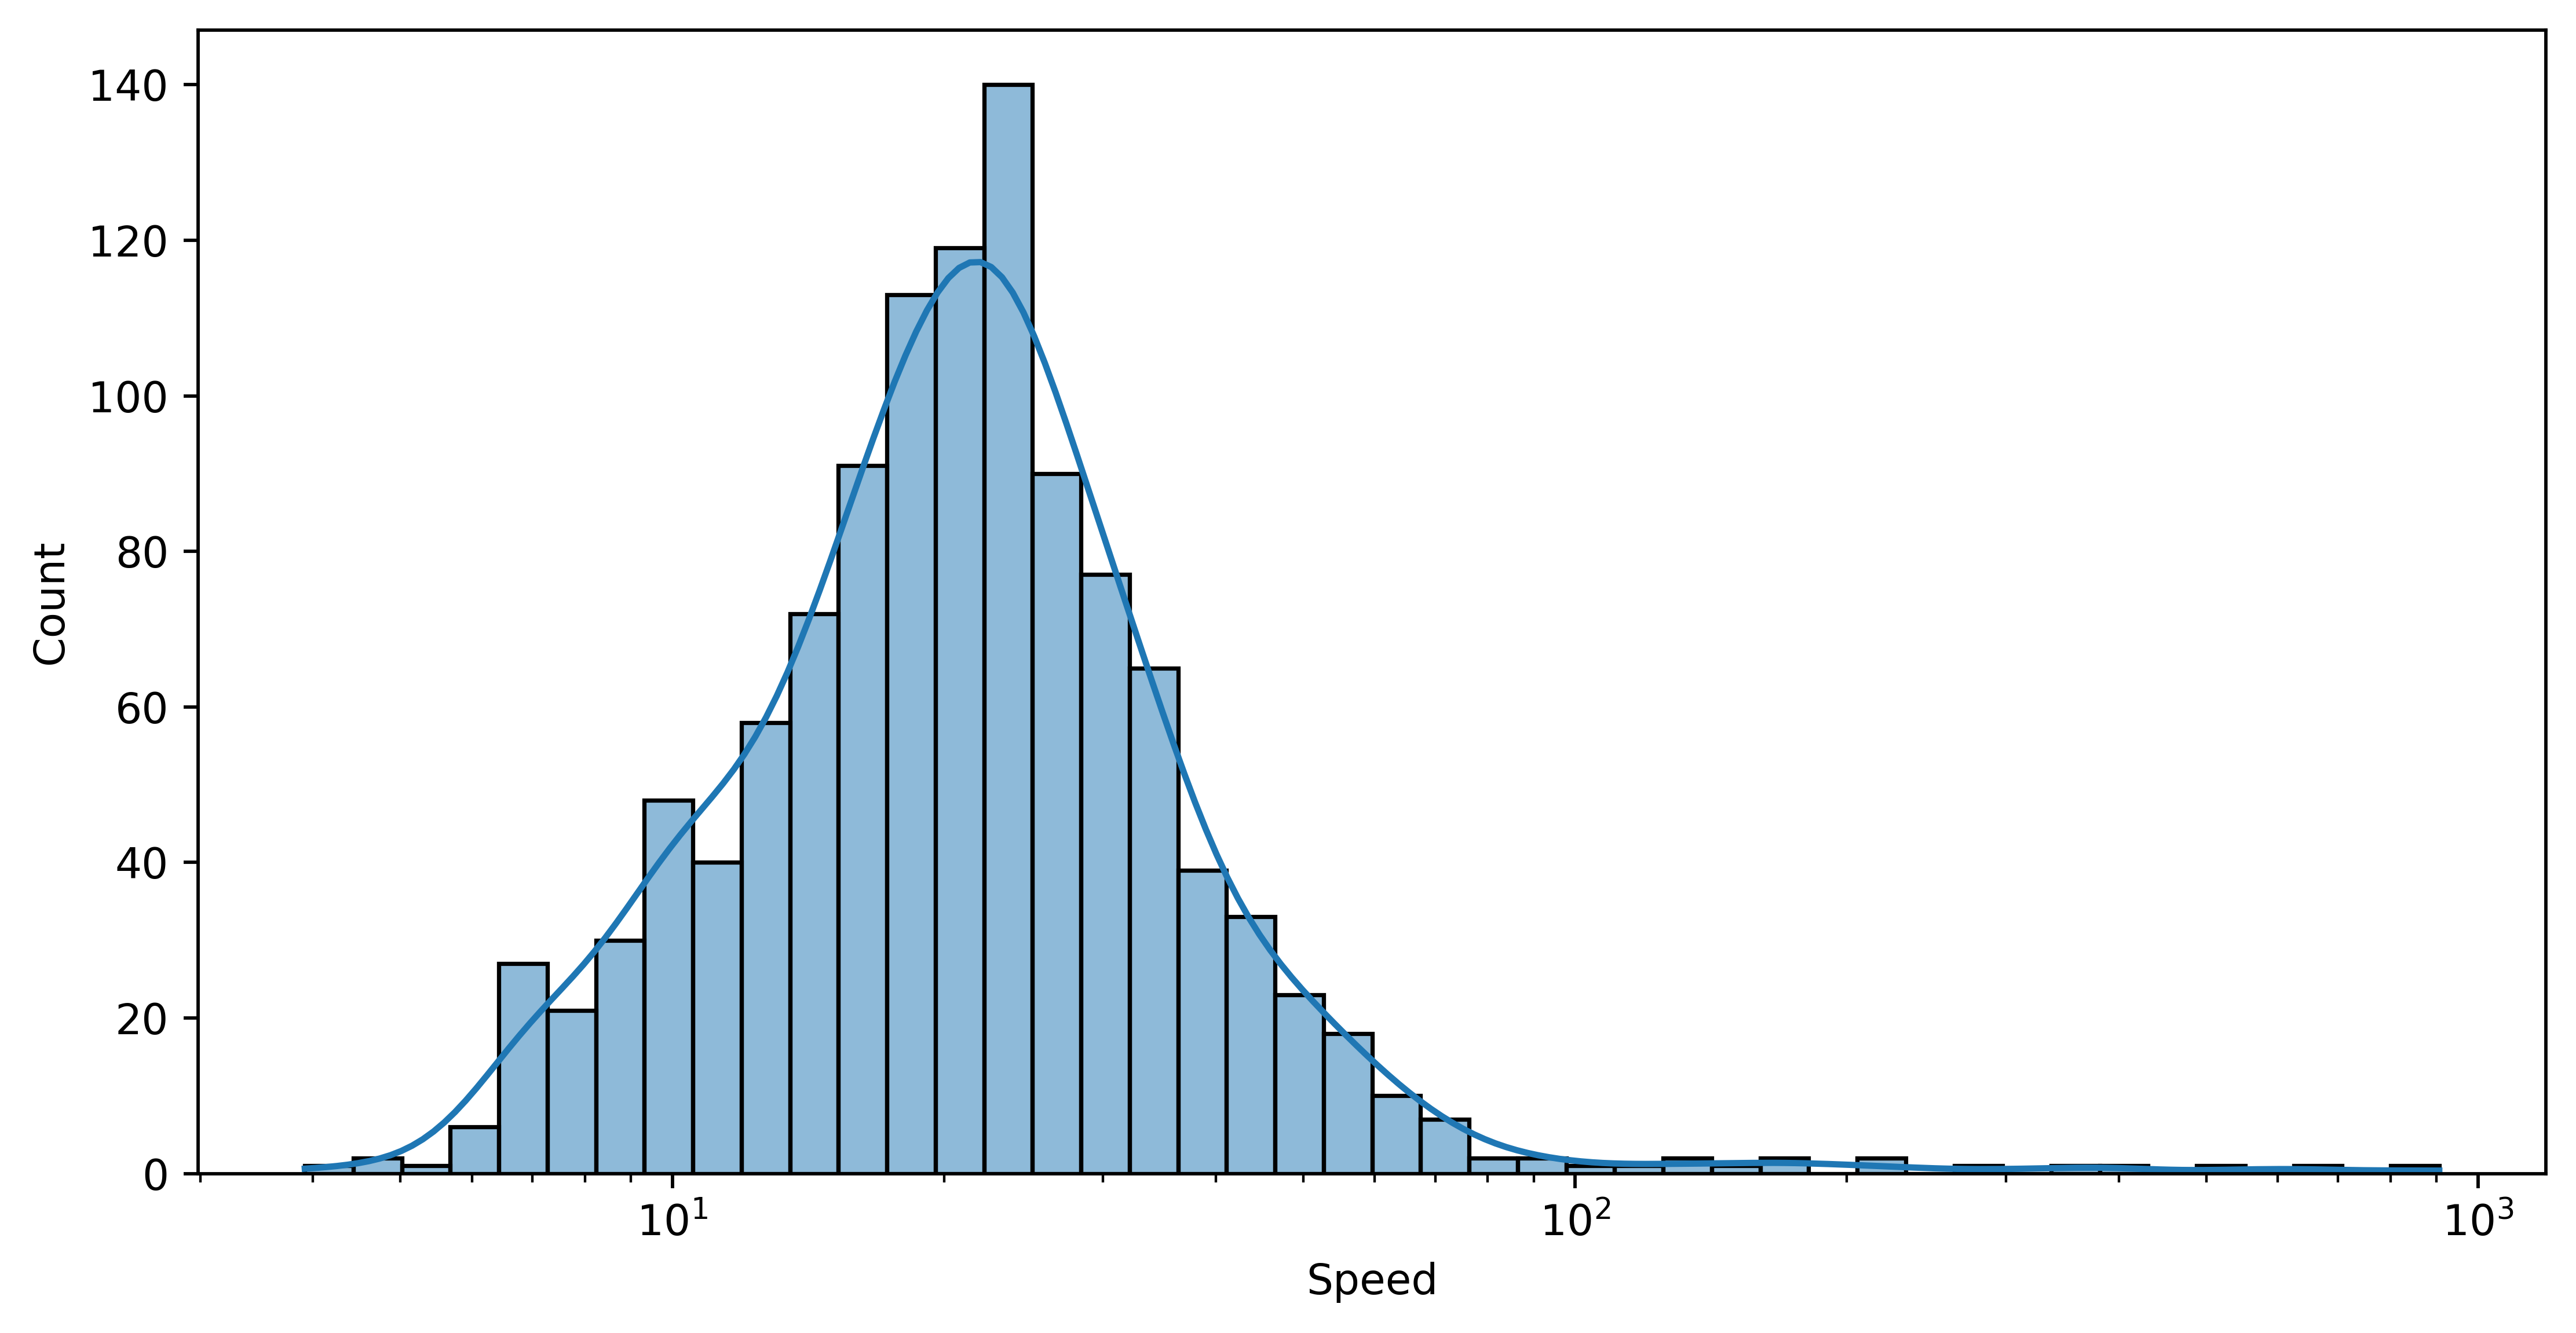

In [38]:
plt.figure(figsize=(10,5), dpi=523)

sns.histplot(x='Speed',data=df, kde=True, log_scale=True)
plt.show()

* **Speed is right skewed**

# Conclusion

* **User mainly uses Uber cabs for its Business purposes** <br>
    * Around 94% miles was consumed during Business trips.
    * Only 6% miles were consumed during personal trips.
* There are 177 unique starting points<br>
    * **Cary is most poplular starting point for this driver.**
* There are 188 unique Stop points.
    * **Cary is most poplular drop point for this driver.**
* **Cary-Durham & Cary-Morrisville and vice versa are the User's longest distance Uber ride.**
* **User usually takes single-trip Uber rides.**
    * Around 75% trip is single-trip and 25% are Round-Trip.
* **User's Most number of rides were in month of December & Least were in September.**
* **Friday has maximum number of trips.**
* **Afternoons and evenings seem to have the maximum number of trips.**
* **User's Longest ride were on April & shortest were on November**